<a href="https://colab.research.google.com/github/DanaShayakhmetova/Demographic-Driven-Ad-Optimization/blob/main/Phase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Phase 3: Data Mining

Some of the following code is from **Phase 2: Staging and Data Mart Creation**

Importing our data:

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/TannerGiddings21/CSI4142/main/customer_segmentation.csv')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# Checking our columns
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Part A: Data Processing

In the following section, we will review and add to the processing steps we completed in Phase 2.

We will visualize the data after these steps.

## Checking for missing values

In [ ]:
# Check for null values in the entire DataFrame
null_values = data.isnull().sum()

# Display null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Missing 24 values in the income column. Let’s fill these in with the median (which is safer to use in case of it being data that is skewed or has outliers).

In [ ]:
# Fill null values in the 'Income' column with the median
print("Median income:")
median_income = data['Income'].median()
print(median_income)
data['Income'].fillna(median_income, inplace=True)

# Re-check for null values in the entire DataFrame
null_values = data.isnull().sum()

# Display null values for each column
print("Null values in each column:")
print(null_values)


Median income:
51381.5
Null values in each column:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [ ]:
# Get data types of every column
column_data_types = data.dtypes

# Print data type of every column
print("Data type of every column:")
print(column_data_types)

Data type of every column:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [ ]:
# Check Marital Status labels and Education labels
print("Marital_Status labels:\n", data["Marital_Status"].value_counts(), "\n")
print("Education labels:\n", data["Education"].value_counts())

Marital_Status labels:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Education labels:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [ ]:
# Convert 'Dt_Customer' column to datetime format and extract date component
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y').dt.date

# Find the range of dates in the 'Dt_Customer' column
min_date = data['Dt_Customer'].min()
max_date = data['Dt_Customer'].max()
date_range = max_date - min_date

# Print the range of dates
print("Range of 'Dt_Customer' column (Date Only):")
print("Minimum Date:", min_date)
print("Maximum Date:", max_date)
print("Date Range:", date_range)

Range of 'Dt_Customer' column (Date Only):
Minimum Date: 2012-07-30
Maximum Date: 2014-06-29
Date Range: 699 days, 0:00:00


## Creating New Features (Feature Engineering) and Creating Groups (Bins)

In [ ]:
# Age of customer in 2014
data['Age_in_2014'] = 2014 - data['Year_Birth']

In [ ]:
# The total amount that they spent
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [ ]:
# Living Situation
data['Living_Situation'] = data['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Single":"Alone", "Divorced":"Alone", "Widow":"Alone", "Absurd":"Alone", "YOLO":"Alone"})

In [ ]:
# Find if customer has a child at home
data['Is_parent'] = (data['Kidhome'] + data['Teenhome'] > 0).astype(int)

In [ ]:
# Number of people in a house hold
data['Household_Size'] = data['Living_Situation'].replace({"Alone": 1, "Partner": 2}) + data['Kidhome'] + data['Teenhome']

In [ ]:
# Clarify Education Levels
data['Education'] = data['Education'].replace({"Basic":"High School", "2n Cycle":"Undergraduate", "Graduation":"Graduate"})

## Generation data and Merge with our data
In this step, we establish a correspondence between years and generations, defining the boundaries for each generation based on commonly accepted criteria. This mapping serves to categorize customers into their respective generational cohorts, providing valuable context for analysis.

The process involves creating a DataFrame from a dictionary (generations) where each generation is associated with a range of birth years. This DataFrame is then merged with the main dataset using the 'Year_Birth' column as the key. This integration enriches the dataset by adding a new column, 'Generation', which indicates the generational cohort to which each customer belongs.

By incorporating generational information into our dataset, we gain insights into how different age groups may exhibit varying behaviors, preferences, and responses to advertising efforts. This contextual understanding is crucial for devising targeted marketing strategies that resonate effectively with each generational segment of the customer base.

(We decided to add this in this way to show that we know how to perform a merge)

In [ ]:
# Define the generations based on years (dictionary)
generations = {
    "Gen Z": range(1997, 2013),
    "Millennial": range(1981, 1996),
    "Gen X": range(1965, 1980),
    "Baby Boomer": range(1946, 1964),
    "Silent Generation": range(1928, 1945)
}

# Create a DataFrame from the generations mapping
generations_df = pd.DataFrame(
    [(year, generation) for generation, years in generations.items() for year in years],
    columns=['Year', 'Generation']
)

# Merge generations_df with our data based on 'Year_Birth' column
data = pd.merge(data, generations_df, left_on='Year_Birth', right_on='Year', how='left')

# Drop the duplicate 'Year' column
data.drop('Year', axis=1, inplace=True)

data.head()


ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduate         Single  58138.0        0         0   
1  2174        1954  Graduate         Single  46344.0        1         1   
2  4141        1965  Graduate       Together  71613.0        0         0   
3  6182        1984  Graduate       Together  26646.0        1         0   
4  5324        1981       PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  Age_in_2014  Total_Spent  Living_Situation  Is_parent  \
0         1           57         1617             Alone          0   
1         0           60           27             Alone          1   
2         0           49          776           Partner          0   
3         0           30           53           Partner          1   
4         0           33          422           Partner          1   

   Household_Size   Generation  
0               1  Baby Boomer  
1               3  Baby Boomer  
2               2        Gen X  
3               3   Millennial  
4               3   Millennial  

[5 rows x 35 columns]

## Verifying the data and checking ranges

In [ ]:
data.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduate         Single  58138.0        0         0   
1  2174        1954  Graduate         Single  46344.0        1         1   
2  4141        1965  Graduate       Together  71613.0        0         0   
3  6182        1984  Graduate       Together  26646.0        1         0   
4  5324        1981       PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  Age_in_2014  Total_Spent  Living_Situation  Is_parent  \
0         1           57         1617             Alone          0   
1         0           60           27             Alone          1   
2         0           49          776           Partner          0   
3         0           30           53           Partner          1   
4         0           33          422           Partner          1   

   Household_Size   Generation  
0               1  Baby Boomer  
1               3  Baby Boomer  
2               2        Gen X  
3               3   Millennial  
4               3   Millennial  

[5 rows x 35 columns]

In [ ]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  AcceptedCmp1  AcceptedCmp2     Complain  \
count      2240.000000  ...   2240.000000   2240.000000  2240.000000   
mean         37.525446  ...      0.064286      0.013393     0.009375   
std          54.628979  ...      0.245316      0.114976     0.096391   
min           0.000000  ...      0.000000      0.000000     0.000000   
25%           3.000000  ...      0.000000      0.000000     0.000000   
50%          12.000000  ...      0.000000      0.000000     0.000000   
75%          50.000000  ...      0.000000      0.000000     0.000000   
max         259.000000  ...      1.000000      1.000000     1.000000   

       Z_CostContact  Z_Revenue     Response  Age_in_2014  Total_Spent  \
count         2240.0     2240.0  2240.000000  2240.000000  2240.000000   
mean             3.0       11.0     0.149107    45.194196   605.798214   
std              0.0        0.0     0.356274    11.984069   602.249288   
min              3.0       11.0     0.000000    18.000000     5.000000   
25%              3.0       11.0     0.000000    37.000000    68.750000   
50%              3.0       11.0     0.000000    44.000000   396.000000   
75%              3.0       11.0     0.000000    55.000000  1045.500000   
max              3.0       11.0     1.000000   121.000000  2525.000000   

         Is_parent  Household_Size  
count  2240.000000     2240.000000  
mean      0.715179        2.595089  
std       0.451430        0.906959  
min       0.000000        1.000000  
25%       0.000000        2.000000  
50%       1.000000        3.000000  
75%       1.000000        3.000000  
max       1.000000        5.000000  

[8 rows x 30 columns]

In [ ]:
# We see that the max age is 121
# Removing Age outliers (we will keep it to under 95 as customers over that likely have people helping them with purchases)
data = data[(data["Age_in_2014"] < 95)]

In [ ]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Print duplicate rows
print("Duplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age_in_2014, Total_Spent, Living_Situation, Is_parent, Household_Size, Generation]
Index: []

[0 rows x 35 columns]


So we have no duplicates!

# Part A: Data Visualization

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age_in_2014', 'Total_Spent', 'Living_Situation', 'Is_parent',
       'Household_Size', 'Generation'],
      dtype='object')

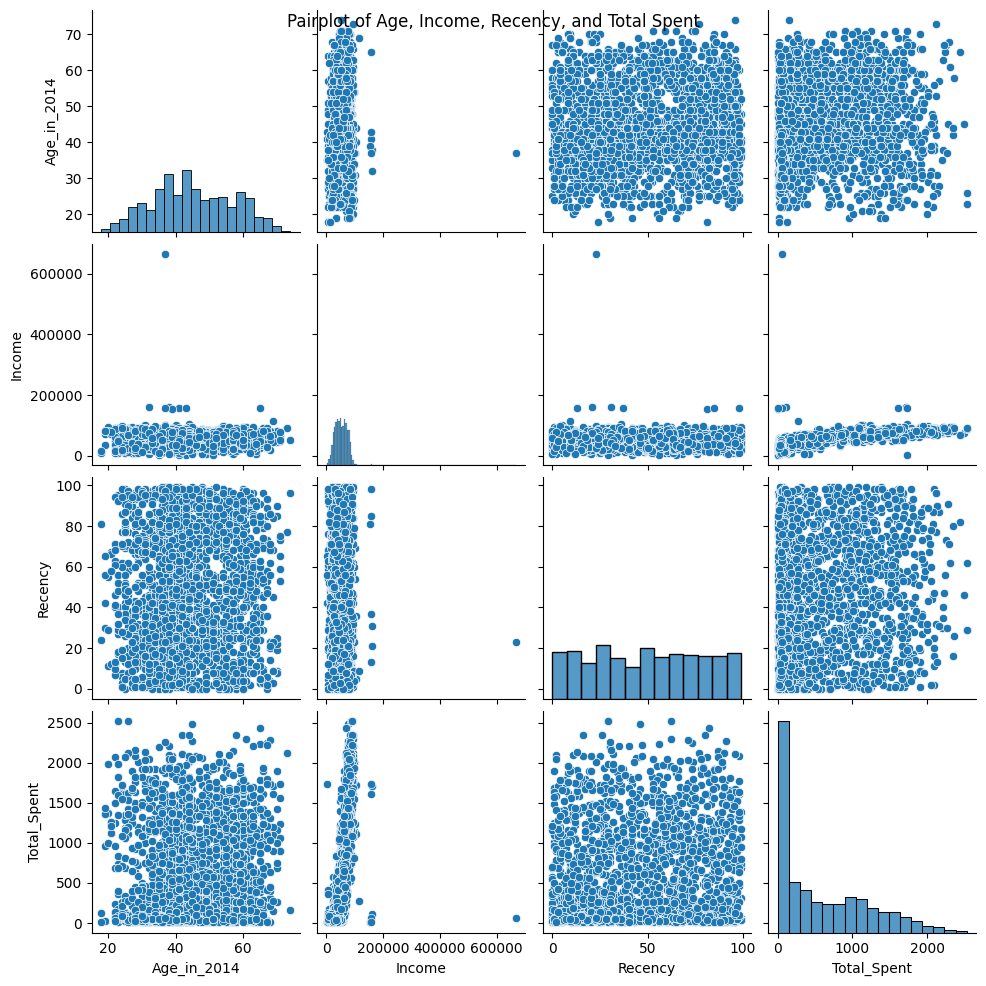

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
sns.pairplot(data[['Age_in_2014', 'Income', 'Recency', 'Total_Spent']])
plt.suptitle("Pairplot of Age, Income, Recency, and Total Spent")
plt.show()


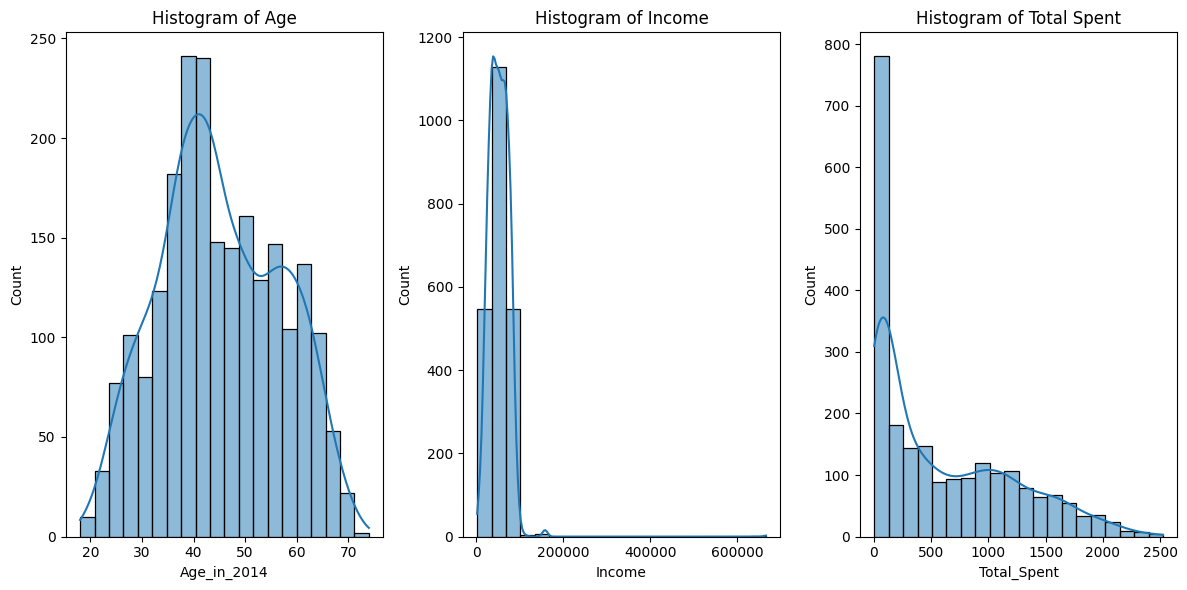

In [ ]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Age_in_2014'], bins=20, kde=True)
plt.title("Histogram of Age")

plt.subplot(1, 3, 2)
sns.histplot(data['Income'], bins=20, kde=True)
plt.title("Histogram of Income")

plt.subplot(1, 3, 3)
sns.histplot(data['Total_Spent'], bins=20, kde=True)
plt.title("Histogram of Total Spent")

plt.tight_layout()
plt.show()

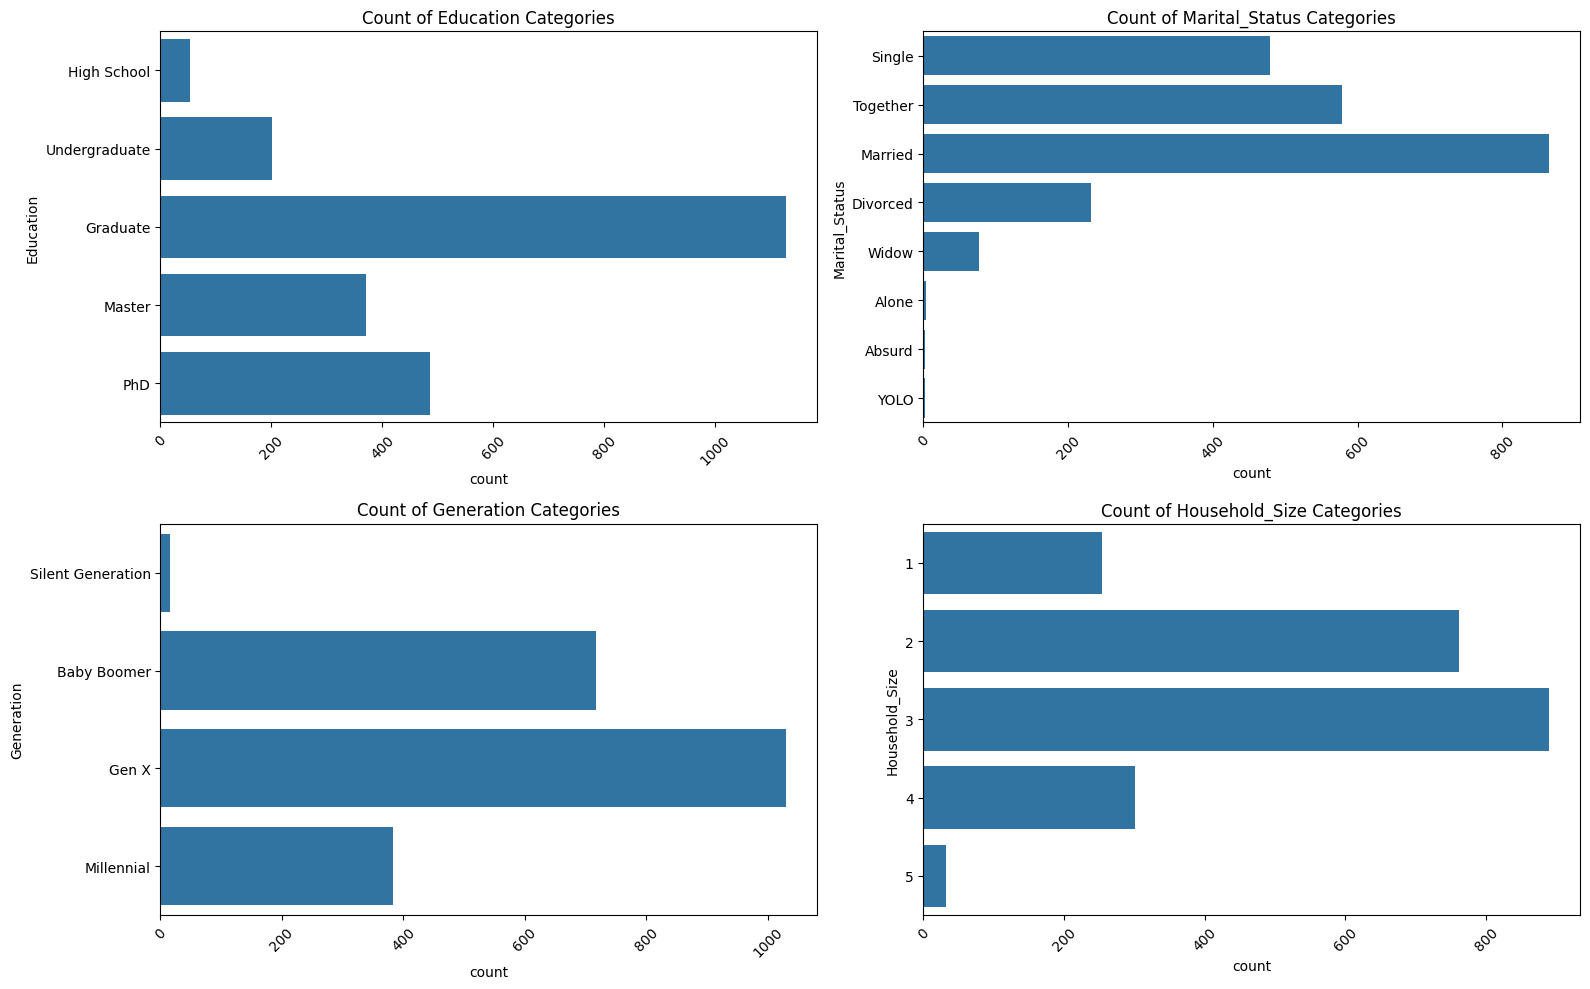

Counts of categories in Education:
Education
Graduate         1127
PhD               485
Master            370
Undergraduate     201
High School        54
Name: count, dtype: int64

Counts of categories in Marital_Status:
Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Counts of categories in Generation:
Generation
Gen X                1030
Baby Boomer           717
Millennial            383
Silent Generation      16
Name: count, dtype: int64

Counts of categories in Household_Size:
Household_Size
3    889
2    761
4    301
1    254
5     32
Name: count, dtype: int64



In [ ]:
# Convert 'Household_Size' to categorical
data['Household_Size'] = data['Household_Size'].astype(str)

# Define the order for Household_Size
household_size_order = ['1', '2', '3', '4', '5']

# Define the order for Education
education_order = ['High School', 'Undergraduate', 'Graduate', 'Master', 'PhD']

# Define the order for Generation
generation_order = ['Silent Generation', 'Baby Boomer', 'Gen X', 'Millennial']

# Bar plot for categorical variables
categorical_vars = ['Education', 'Marital_Status', 'Generation', 'Household_Size']
plt.figure(figsize=(16, 10))  # Adjust figsize as needed
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    order = education_order if var == 'Education' else household_size_order if var == 'Household_Size' else generation_order if var == 'Generation' else None
    sns.countplot(data[var], order=order)
    plt.title(f"Count of {var} Categories")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print out the count of each category for the specified categorical variables
for var in categorical_vars:
    print(f"Counts of categories in {var}:")
    print(data[var].value_counts())
    print()


We are also going to drop the Z valued colums and they are the same for all entries:

In [ ]:
# Drop 'Z_CostContact' and 'Z_Revenue' columns from data
data = data.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

ValueError: could not convert string to float: 'Graduate'

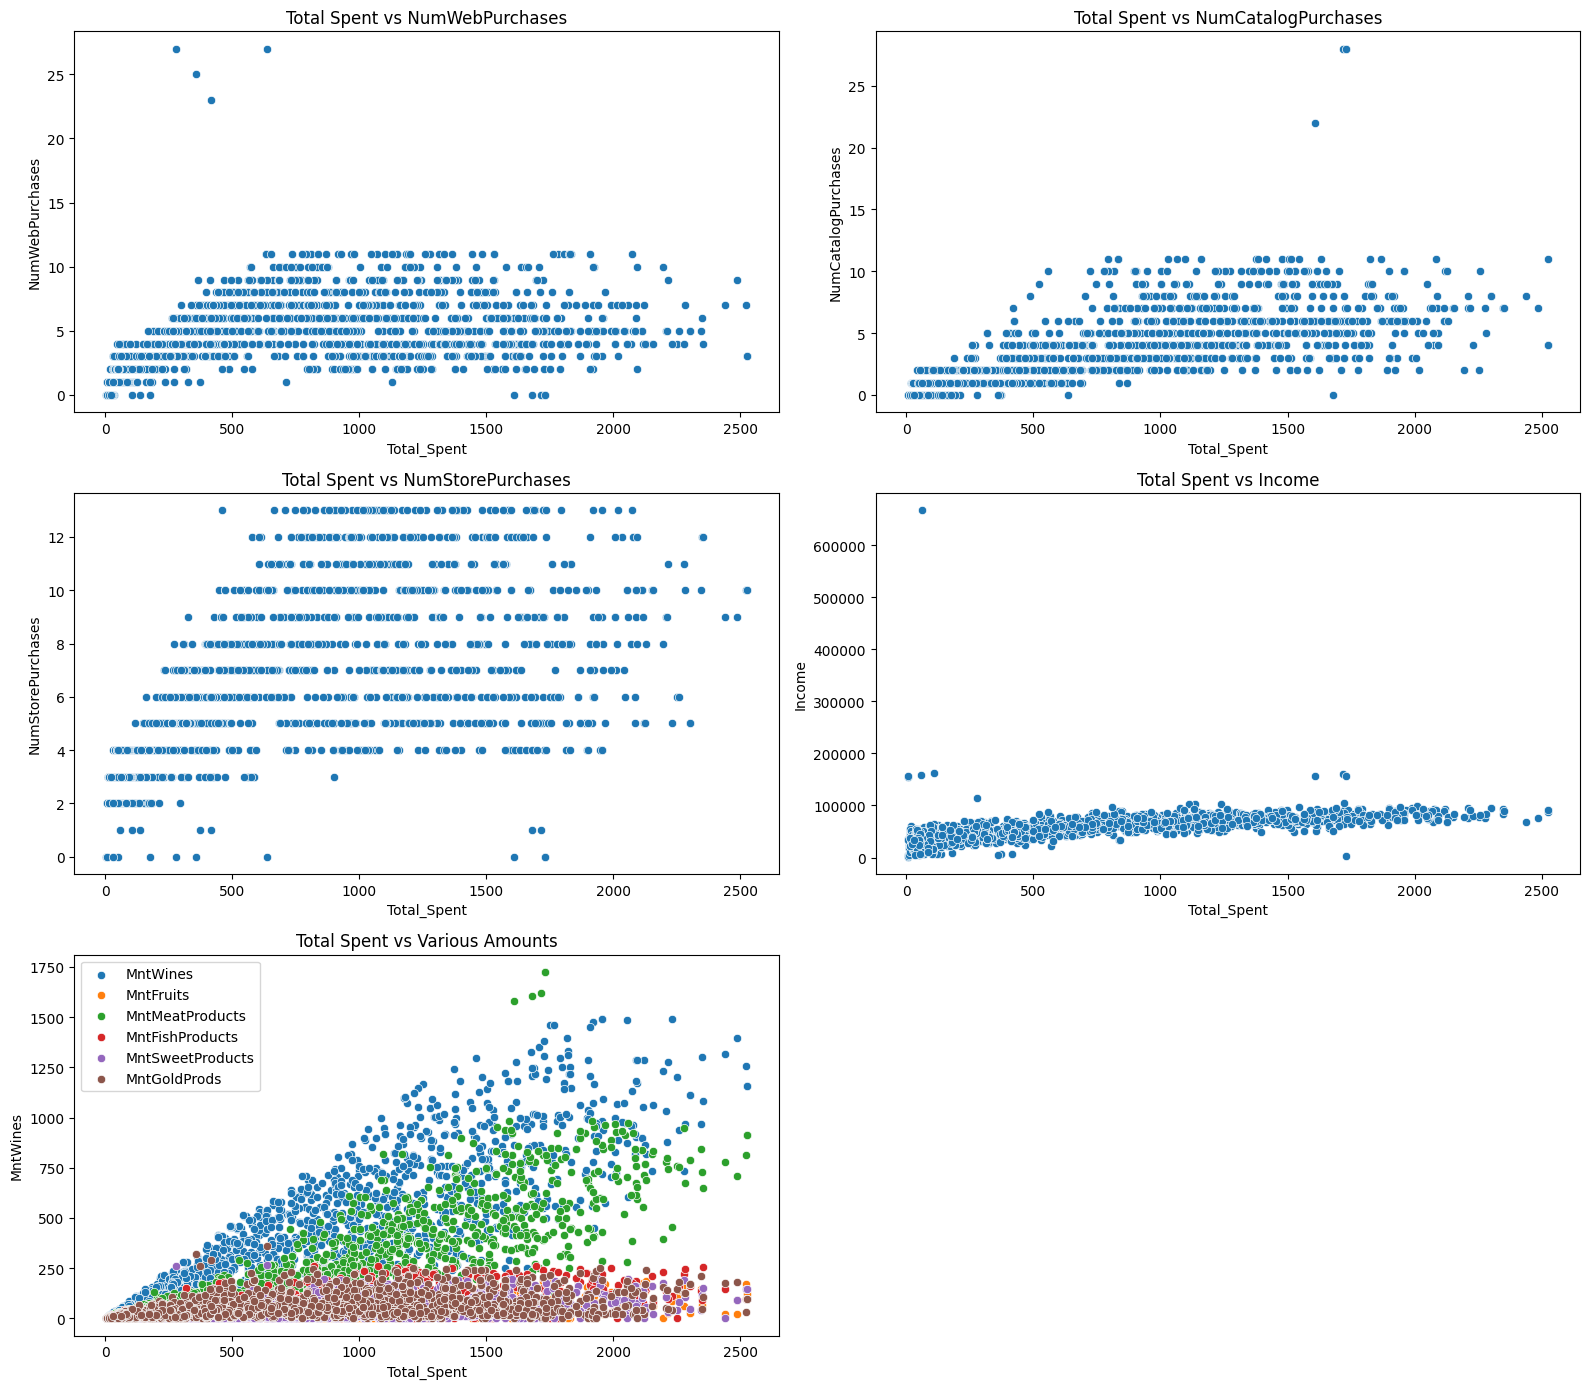

In [ ]:
# Let's look into some of these interesting combinations
# Scatter plots for various combinations

plt.figure(figsize=(16, 14))

# Total_Spent and NumWebPurchases
plt.subplot(3, 2, 1)
sns.scatterplot(data=data, x='Total_Spent', y='NumWebPurchases')
plt.title("Total Spent vs NumWebPurchases")

# Total_Spent and NumCatalogPurchases
plt.subplot(3, 2, 2)
sns.scatterplot(data=data, x='Total_Spent', y='NumCatalogPurchases')
plt.title("Total Spent vs NumCatalogPurchases")

# Total_Spent and NumStorePurchases
plt.subplot(3, 2, 3)
sns.scatterplot(data=data, x='Total_Spent', y='NumStorePurchases')
plt.title("Total Spent vs NumStorePurchases")

# Total_Spent and Income
plt.subplot(3, 2, 4)
sns.scatterplot(data=data, x='Total_Spent', y='Income')
plt.title("Total Spent vs Income")

# Total_Spent and all the amounts ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
plt.subplot(3, 2, 5)
sns.scatterplot(data=data, x='Total_Spent', y='MntWines', label='MntWines')
sns.scatterplot(data=data, x='Total_Spent', y='MntFruits', label='MntFruits')
sns.scatterplot(data=data, x='Total_Spent', y='MntMeatProducts', label='MntMeatProducts')
sns.scatterplot(data=data, x='Total_Spent', y='MntFishProducts', label='MntFishProducts')
sns.scatterplot(data=data, x='Total_Spent', y='MntSweetProducts', label='MntSweetProducts')
sns.scatterplot(data=data, x='Total_Spent', y='MntGoldProds', label='MntGoldProds')
plt.title("Total Spent vs Various Amounts")
plt.legend()

plt.tight_layout()
plt.show()


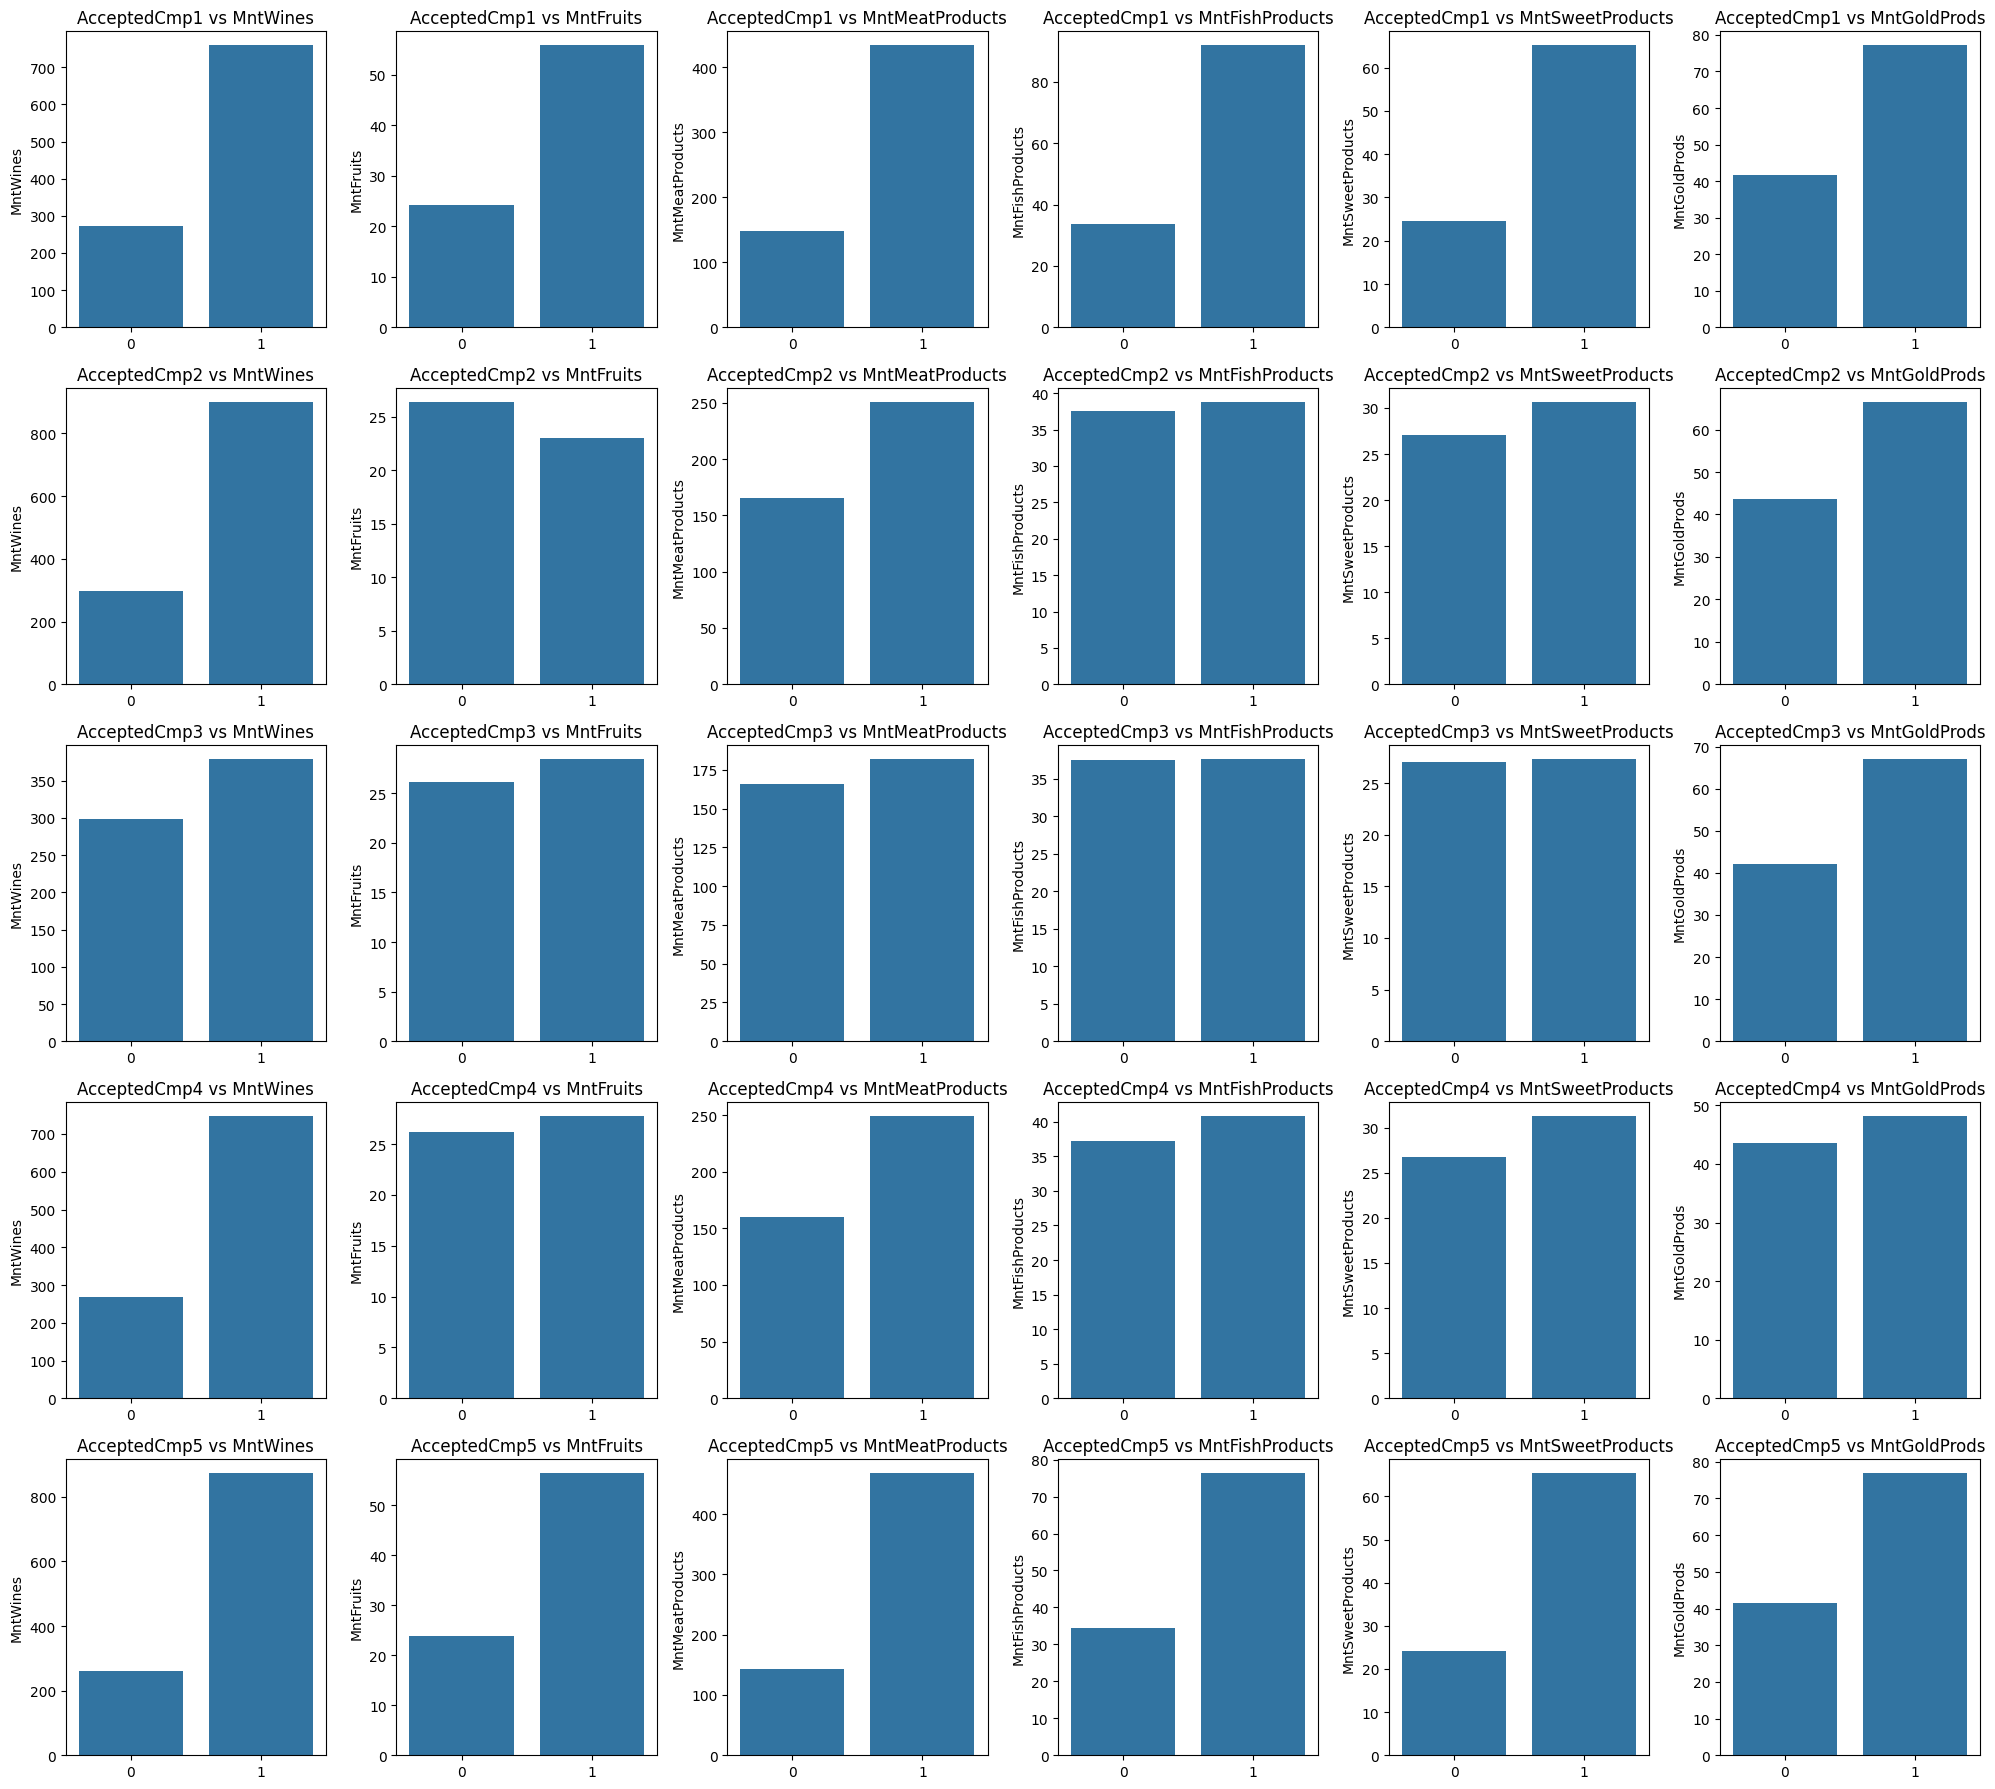

In [ ]:
# Bar plots for Accepted Campaigns and Amounts (separate plots)
plt.figure(figsize=(20, 18))

# Create a list of accepted campaign columns in the desired order
accepted_campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Create a list of amount columns
amount_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Loop through each combination of accepted campaign and amount, and plot them in separate subplots
for i, campaign in enumerate(accepted_campaigns, 1):
    for j, amount in enumerate(amount_columns, 1):
        plt.subplot(len(accepted_campaigns), len(amount_columns), (i-1)*len(amount_columns) + j)
        sns.barplot(data=data, x=campaign, y=amount, ci=None)
        plt.title(f"{campaign} vs {amount}")
        plt.xlabel("")  # Remove x-axis label to avoid overlap

plt.tight_layout()
plt.show()



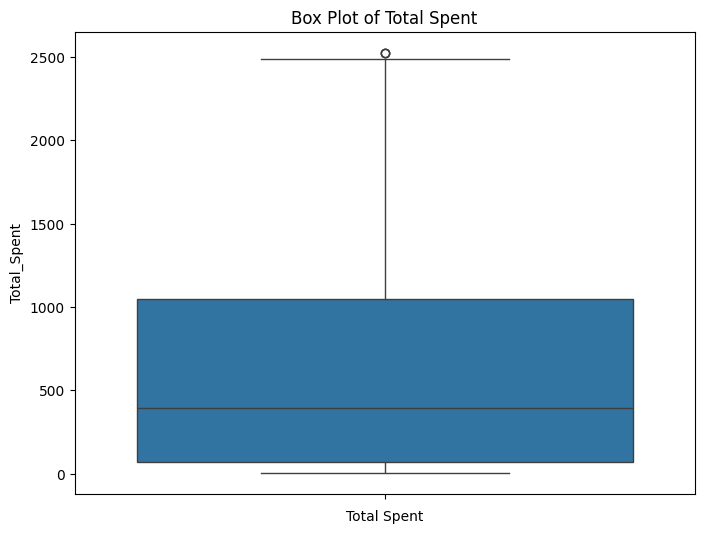

In [ ]:
# Now checking for outliers in the data
# Box plot for Total_Spent
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Total_Spent'])
plt.title("Box Plot of Total Spent")
plt.xlabel("Total Spent")
plt.show()

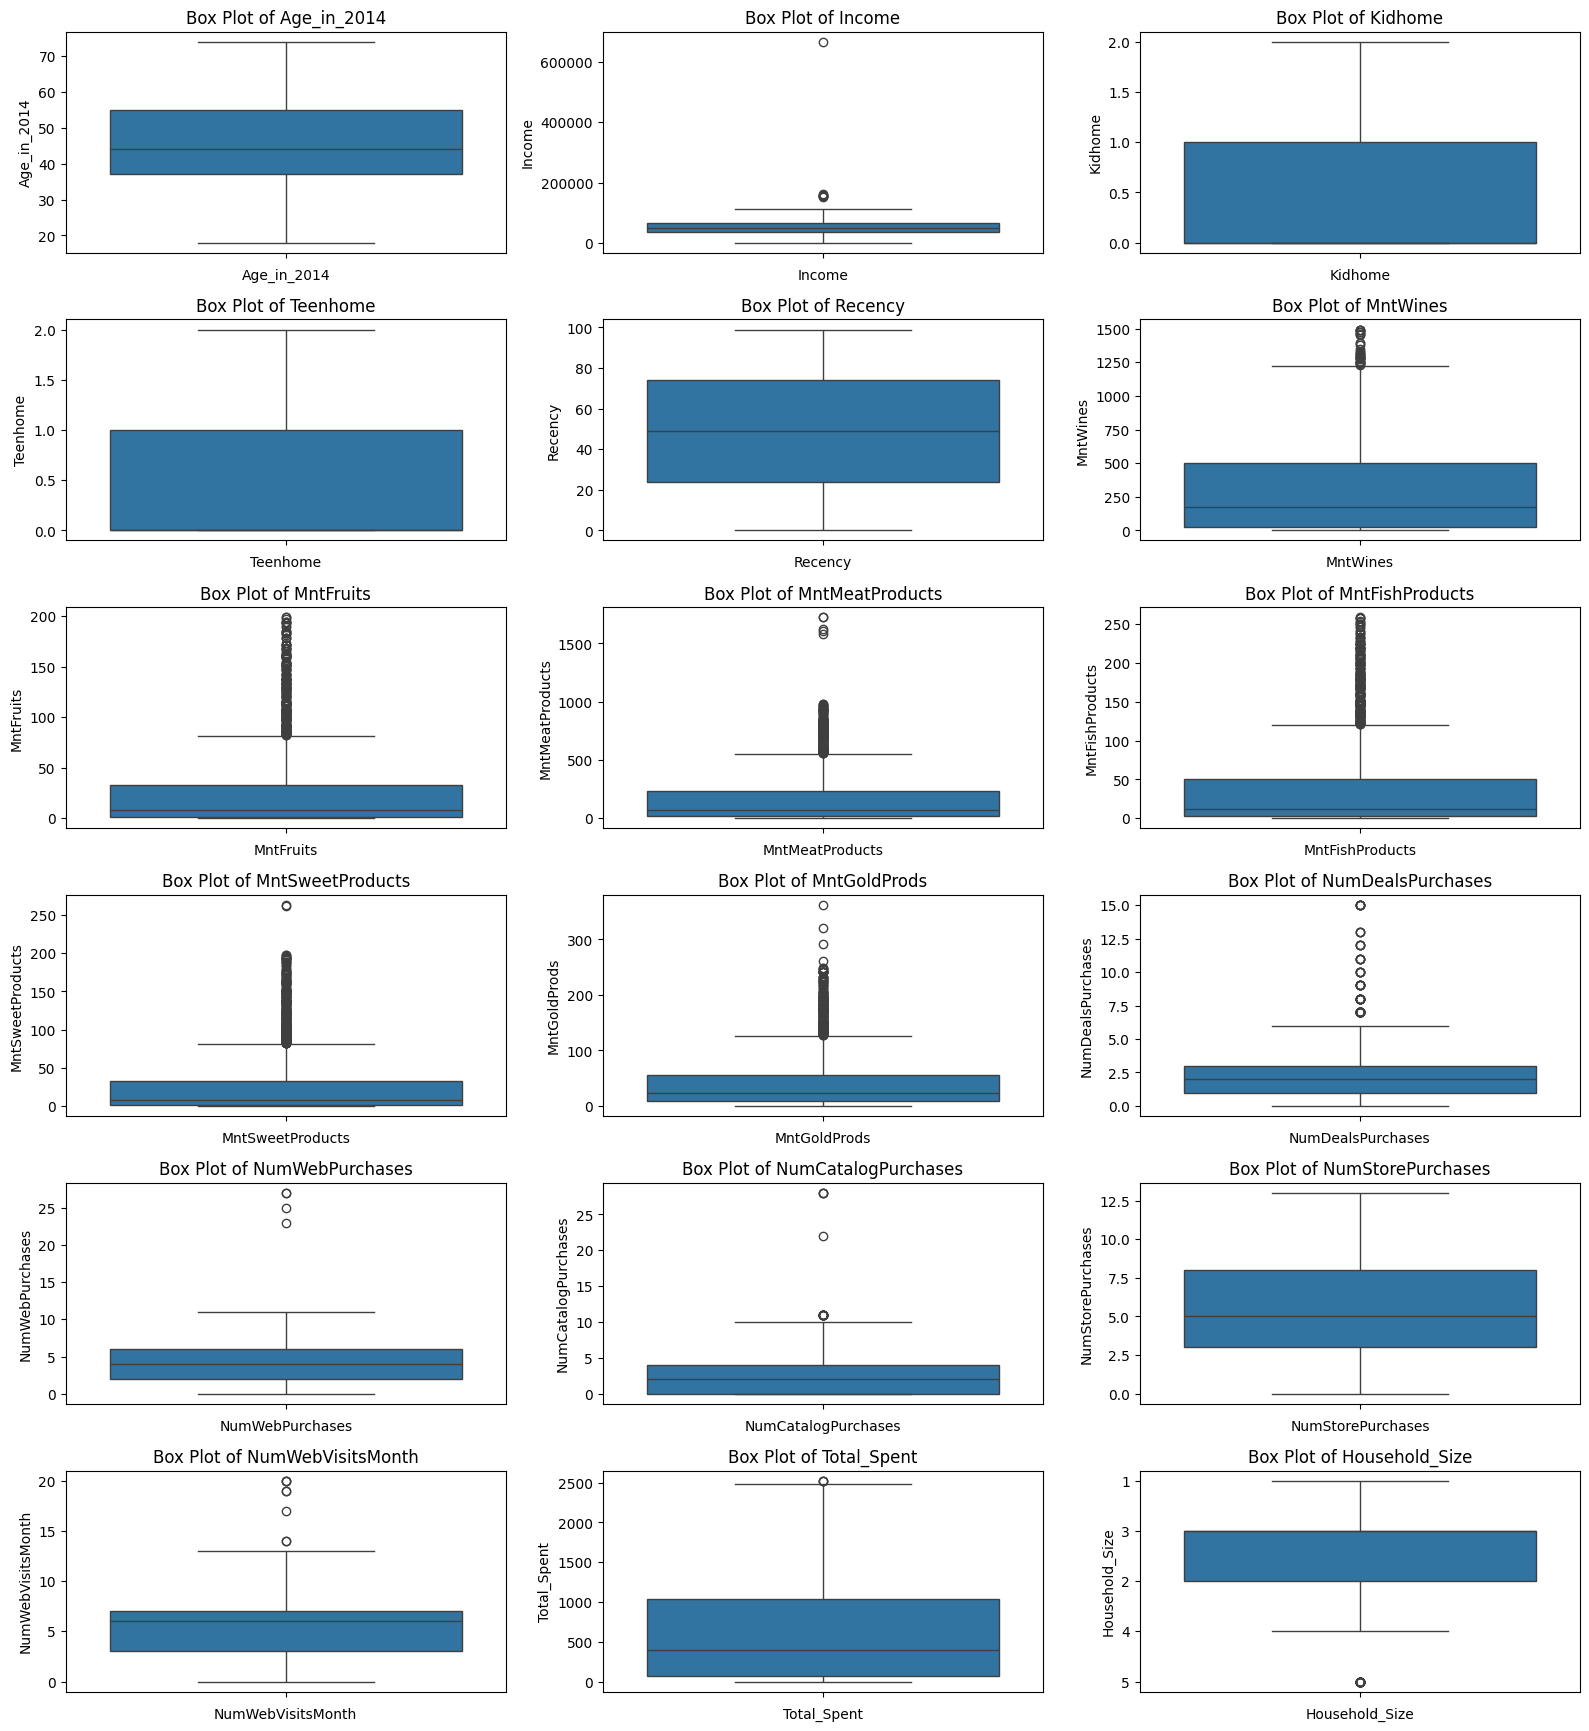

In [ ]:
# Select numerical columns for box plots
numerical_cols = ['Age_in_2014', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth', 'Total_Spent', 'Household_Size']

# Create box plots for each numerical column
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(data=data[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


# Part A: Feature Selection

## Data Transformation: Categorical Attributes

### One-Hot Encoding

In [ ]:
# Define the categorical variables to be one-hot encoded
categorical_vars = ['Education', 'Marital_Status', 'Generation', 'Household_Size', 'Living_Situation', 'Is_parent']

# Perform one-hot encoding
one_hot_encoded_data = pd.get_dummies(data, columns=categorical_vars)

# Display the first few rows of the one-hot encoded dataframe
print(one_hot_encoded_data.head())


     ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-09-04       58   
1  2174        1954  46344.0        1         1  2014-03-08       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-02-10       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Generation_Silent Generation  \
0       635         88              546  ...                         False   
1        11          1                6  ...                         False   
2       426         49              127  ...                         False   
3        11          4               20  ...                         False   
4       173         43              118  ...                         False   

   Household_Size_1  Household_Size_2  Household_Size_3  Household_Size_4  \
0              True  

In [ ]:
# Get data types of every column
column_data_types = one_hot_encoded_data.dtypes

# Print data type of every column
print("Data type of every column:")
print(column_data_types)

Data type of every column:
ID                                int64
Year_Birth                        int64
Income                          float64
Kidhome                           int64
Teenhome                          int64
Dt_Customer                      object
Recency                           int64
MntWines                          int64
MntFruits                         int64
MntMeatProducts                   int64
MntFishProducts                   int64
MntSweetProducts                  int64
MntGoldProds                      int64
NumDealsPurchases                 int64
NumWebPurchases                   int64
NumCatalogPurchases               int64
NumStorePurchases                 int64
NumWebVisitsMonth                 int64
AcceptedCmp3                      int64
AcceptedCmp4                      int64
AcceptedCmp5                      int64
AcceptedCmp1                      int64
AcceptedCmp2                      int64
Complain                          int64
Response     

We also need to change some of the binary variables from numerical to categorical. One-hot encoding isn't necessary for this part as they already represent discrete categories.

In [ ]:
data_encoded = one_hot_encoded_data

In [ ]:
# Identify binary variables
binary_vars = []
for col in data_encoded.columns:
    if (data_encoded[col].nunique() == 2 and
        data_encoded[col].dtype == 'int64') or \
       (col.startswith('AcceptedCmp') and
        data_encoded[col].nunique() == 2) or \
       col in ['Complain', 'Response']:
        binary_vars.append(col)

# Print the binary variables identified
print("Binary Variables:")
print(binary_vars)


Binary Variables:
['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


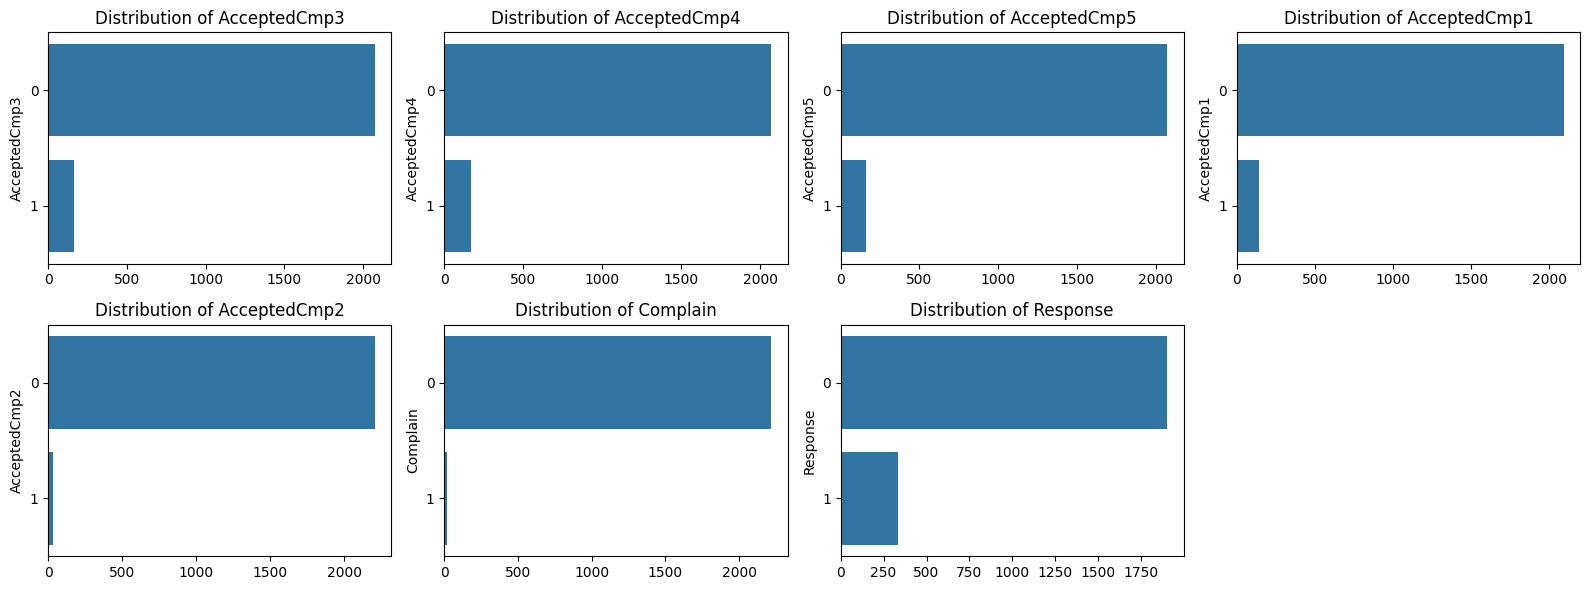

In [ ]:
# Convert binary variables to categorical
data_encoded[binary_vars] = data_encoded[binary_vars].astype('category')

# Plot distribution plots for binary variables
plt.figure(figsize=(16, 6))
for i, col in enumerate(binary_vars, 1):
    plt.subplot(2, (len(binary_vars) + 1) // 2, i)
    sns.countplot(data_encoded[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
plt.tight_layout()
plt.show()

We need to continue to normalization...

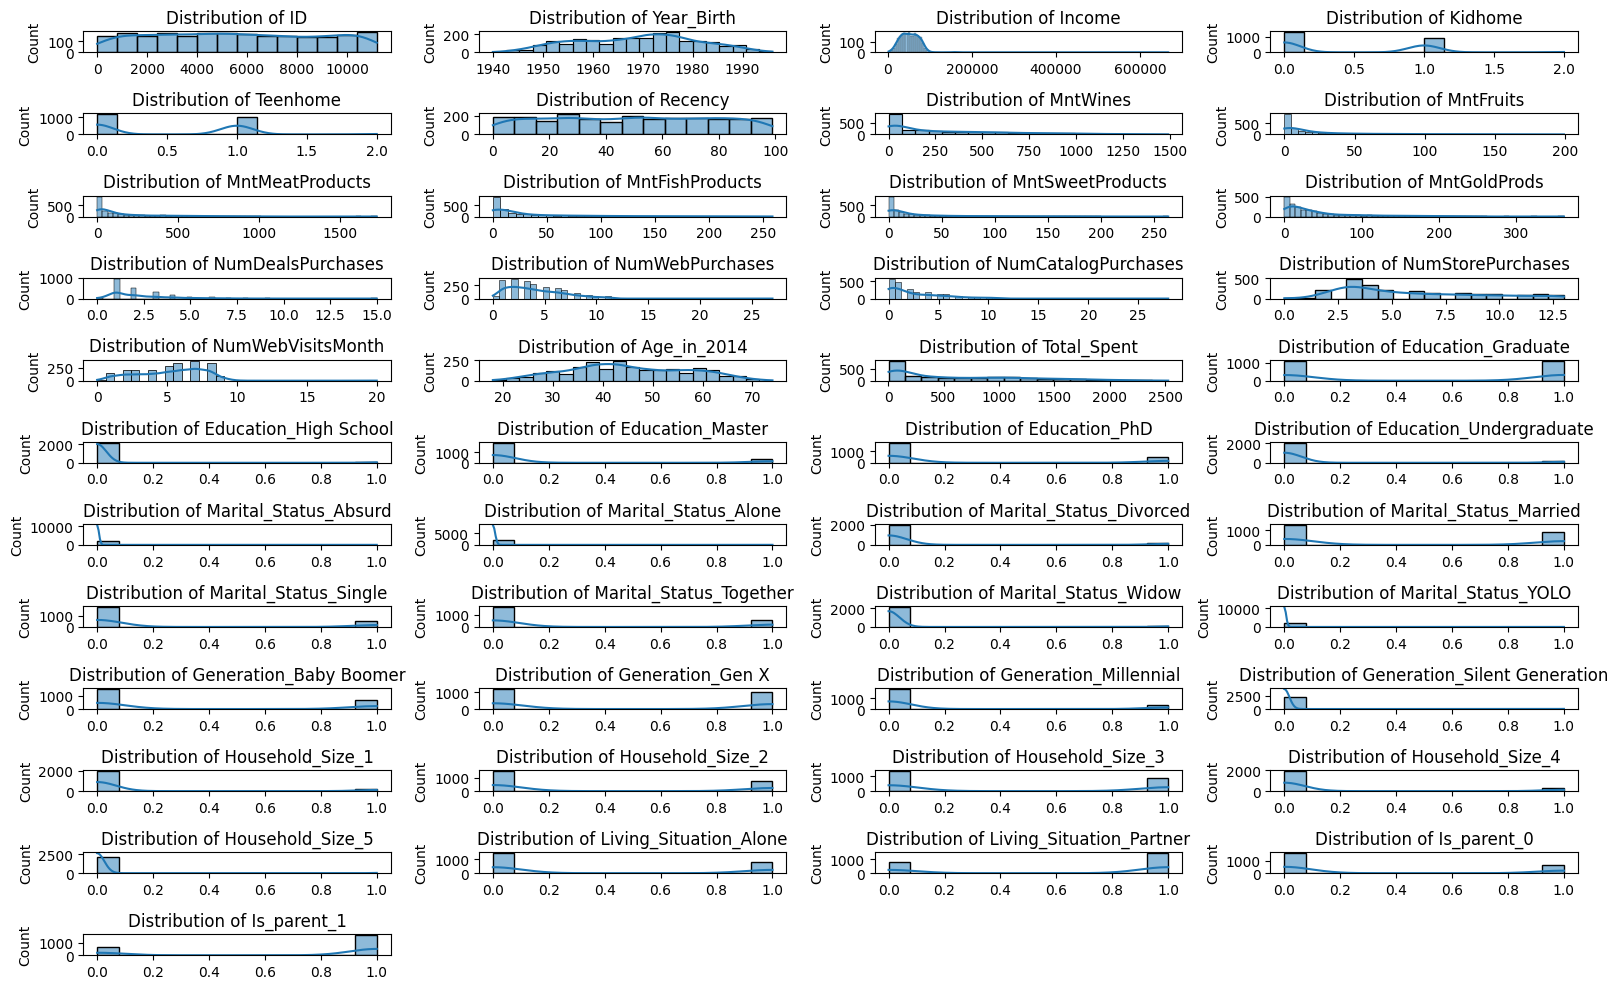

In [ ]:
# Get data types of all columns
column_types = data_encoded.dtypes

# Exclude binary variables from numerical variables
numerical_vars = column_types[(column_types != 'object') & (~column_types.index.isin(binary_vars))].index

# Plot distribution plots for numerical variables
plt.figure(figsize=(16, 10))
num_plots = len(numerical_vars)
num_rows = (num_plots - 1) // 4 + 1  # Calculate the number of rows needed

for i, col in enumerate(numerical_vars, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data_encoded[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.show()




Looks like we have to normalize:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply min-max normalization to numerical variables
data_encoded[numerical_vars] = scaler.fit_transform(data_encoded[numerical_vars])

data_encoded.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0 0.493611    0.303571 0.084832 0.000000  0.000000  2012-09-04 0.585859   
1 0.194263    0.250000 0.067095 0.500000  0.500000  2014-03-08 0.383838   
2 0.370029    0.446429 0.105097 0.000000  0.000000  2013-08-21 0.262626   
3 0.552408    0.785714 0.037471 0.500000  0.000000  2014-02-10 0.262626   
4 0.475739    0.732143 0.085065 0.500000  0.000000  2014-01-19 0.949495   

   MntWines  MntFruits  MntMeatProducts  ...  Generation_Silent Generation  \
0  0.425318   0.442211         0.316522  ...                      0.000000   
1  0.007368   0.005025         0.003478  ...                      0.000000   
2  0.285332   0.246231         0.073623  ...                      0.000000   
3  0.007368   0.020101         0.011594  ...                      0.000000   
4  0.115874   0.216080         0.068406  ...                      0.000000   

   Household_Size_1  Household_Size_2  Household_Size_3  Household_Size_4  \
0          1.000000          0.000000          0.000000          0.000000   
1          0.000000          0.000000          1.000000          0.000000   
2          0.000000          1.000000          0.000000          0.000000   
3          0.000000          0.000000          1.000000          0.000000   
4          0.000000          0.000000          1.000000          0.000000   

   Household_Size_5  Living_Situation_Alone  Living_Situation_Partner  \
0          0.000000                1.000000                  0.000000   
1          0.000000                1.000000                  0.000000   
2          0.000000                0.000000                  1.000000   
3          0.000000                0.000000                  1.000000   
4          0.000000                0.000000                  1.000000   

  Is_parent_0 Is_parent_1  
0    1.000000    0.000000  
1    0.000000    1.000000  
2    1.000000    0.000000  
3    0.000000    1.000000  
4    0.000000    1.000000  

[5 rows x 53 columns]

In [ ]:
# Set display option to show numbers without scientific notation (scientific notation was quite chaotic)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

data_encoded.describe()

ID  Year_Birth      Income     Kidhome    Teenhome     Recency  \
count 2237.000000 2237.000000 2237.000000 2237.000000 2237.000000 2237.000000   
mean     0.499573    0.516101    0.075943    0.222173    0.253241    0.496006   
std      0.289976    0.208963    0.037663    0.269234    0.272296    0.292486   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.252792    0.339286    0.050821    0.000000    0.000000    0.242424   
50%      0.487445    0.535714    0.074671    0.000000    0.000000    0.494949   
75%      0.753016    0.660714    0.100086    0.500000    0.500000    0.747475   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         MntWines   MntFruits  MntMeatProducts  MntFishProducts  ...  \
count 2237.000000 2237.000000      2237.000000      2237.000000  ...   
mean     0.203614    0.132012         0.096763         0.144877  ...   
std      0.225435    0.199578         0.130818         0.210965  ...   
min      0.000000    0.000000         0.000000         0.000000  ...   
25%      0.016075    0.005025         0.009275         0.011583  ...   
50%      0.116544    0.040201         0.038841         0.046332  ...   
75%      0.337575    0.165829         0.134493         0.193050  ...   
max      1.000000    1.000000         1.000000         1.000000  ...   

       Generation_Silent Generation  Household_Size_1  Household_Size_2  \
count                   2237.000000       2237.000000       2237.000000   
mean                       0.007152          0.113545          0.340188   
std                        0.084288          0.317329          0.473878   
min                        0.000000          0.000000          0.000000   
25%                        0.000000          0.000000          0.000000   
50%                        0.000000          0.000000          0.000000   
75%                        0.000000          0.000000          1.000000   
max                        1.000000          1.000000          1.000000   

       Household_Size_3  Household_Size_4  Household_Size_5  \
count       2237.000000       2237.000000       2237.000000   
mean           0.397407          0.134555          0.014305   
std            0.489471          0.341324          0.118771   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            1.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       Living_Situation_Alone  Living_Situation_Partner  Is_parent_0  \
count             2237.000000               2237.000000  2237.000000   
mean                 0.354940                  0.645060     0.284756   
std                  0.478602                  0.478602     0.451399   
min                  0.000000                  0.000000     0.000000   
25%                  0.000000                  0.000000     0.000000   
50%                  0.000000                  1.000000     0.000000   
75%                  1.000000                  1.000000     1.000000   
max                  1.000000                  1.000000     1.000000   

       Is_parent_1  
count  2237.000000  
mean      0.715244  
std       0.451399  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 45 columns]

We also need to do something with the dates...

We are going to change that into categories.

In [ ]:
# Convert 'Dt_Customer' column to datetime type if it's not already in datetime format (it should be from Phase 2, but just to make sure)
data_encoded['Dt_Customer'] = pd.to_datetime(data_encoded['Dt_Customer'])

# Define the ranges for your bins (monthly intervals)
bins = pd.date_range(start='2012-07-01', end='2014-07-01', freq='M')

# Bin the dates into categories
data_encoded['Enrollment_Date_Category'] = pd.cut(data_encoded['Dt_Customer'], bins=bins, labels=[f'{month.strftime("%B")} {month.year}' for month in bins[1:]])

# Can also convert binned categories into dummy variables using one-hot encoding
data_encoded = pd.get_dummies(data_encoded, columns=['Enrollment_Date_Category'])

# Drop the original 'Dt_Customer' column if needed
data_encoded = data_encoded.drop(columns=['Dt_Customer'])

# Display the modified dataframe
print(data_encoded.head())


        ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0 0.493611    0.303571 0.084832 0.000000  0.000000 0.585859  0.425318   
1 0.194263    0.250000 0.067095 0.500000  0.500000 0.383838  0.007368   
2 0.370029    0.446429 0.105097 0.000000  0.000000 0.262626  0.285332   
3 0.552408    0.785714 0.037471 0.500000  0.000000 0.262626  0.007368   
4 0.475739    0.732143 0.085065 0.500000  0.000000 0.949495  0.115874   

   MntFruits  MntMeatProducts  MntFishProducts  ...  \
0   0.442211         0.316522         0.664093  ...   
1   0.005025         0.003478         0.007722  ...   
2   0.246231         0.073623         0.428571  ...   
3   0.020101         0.011594         0.038610  ...   
4   0.216080         0.068406         0.177606  ...   

   Enrollment_Date_Category_September 2013  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   


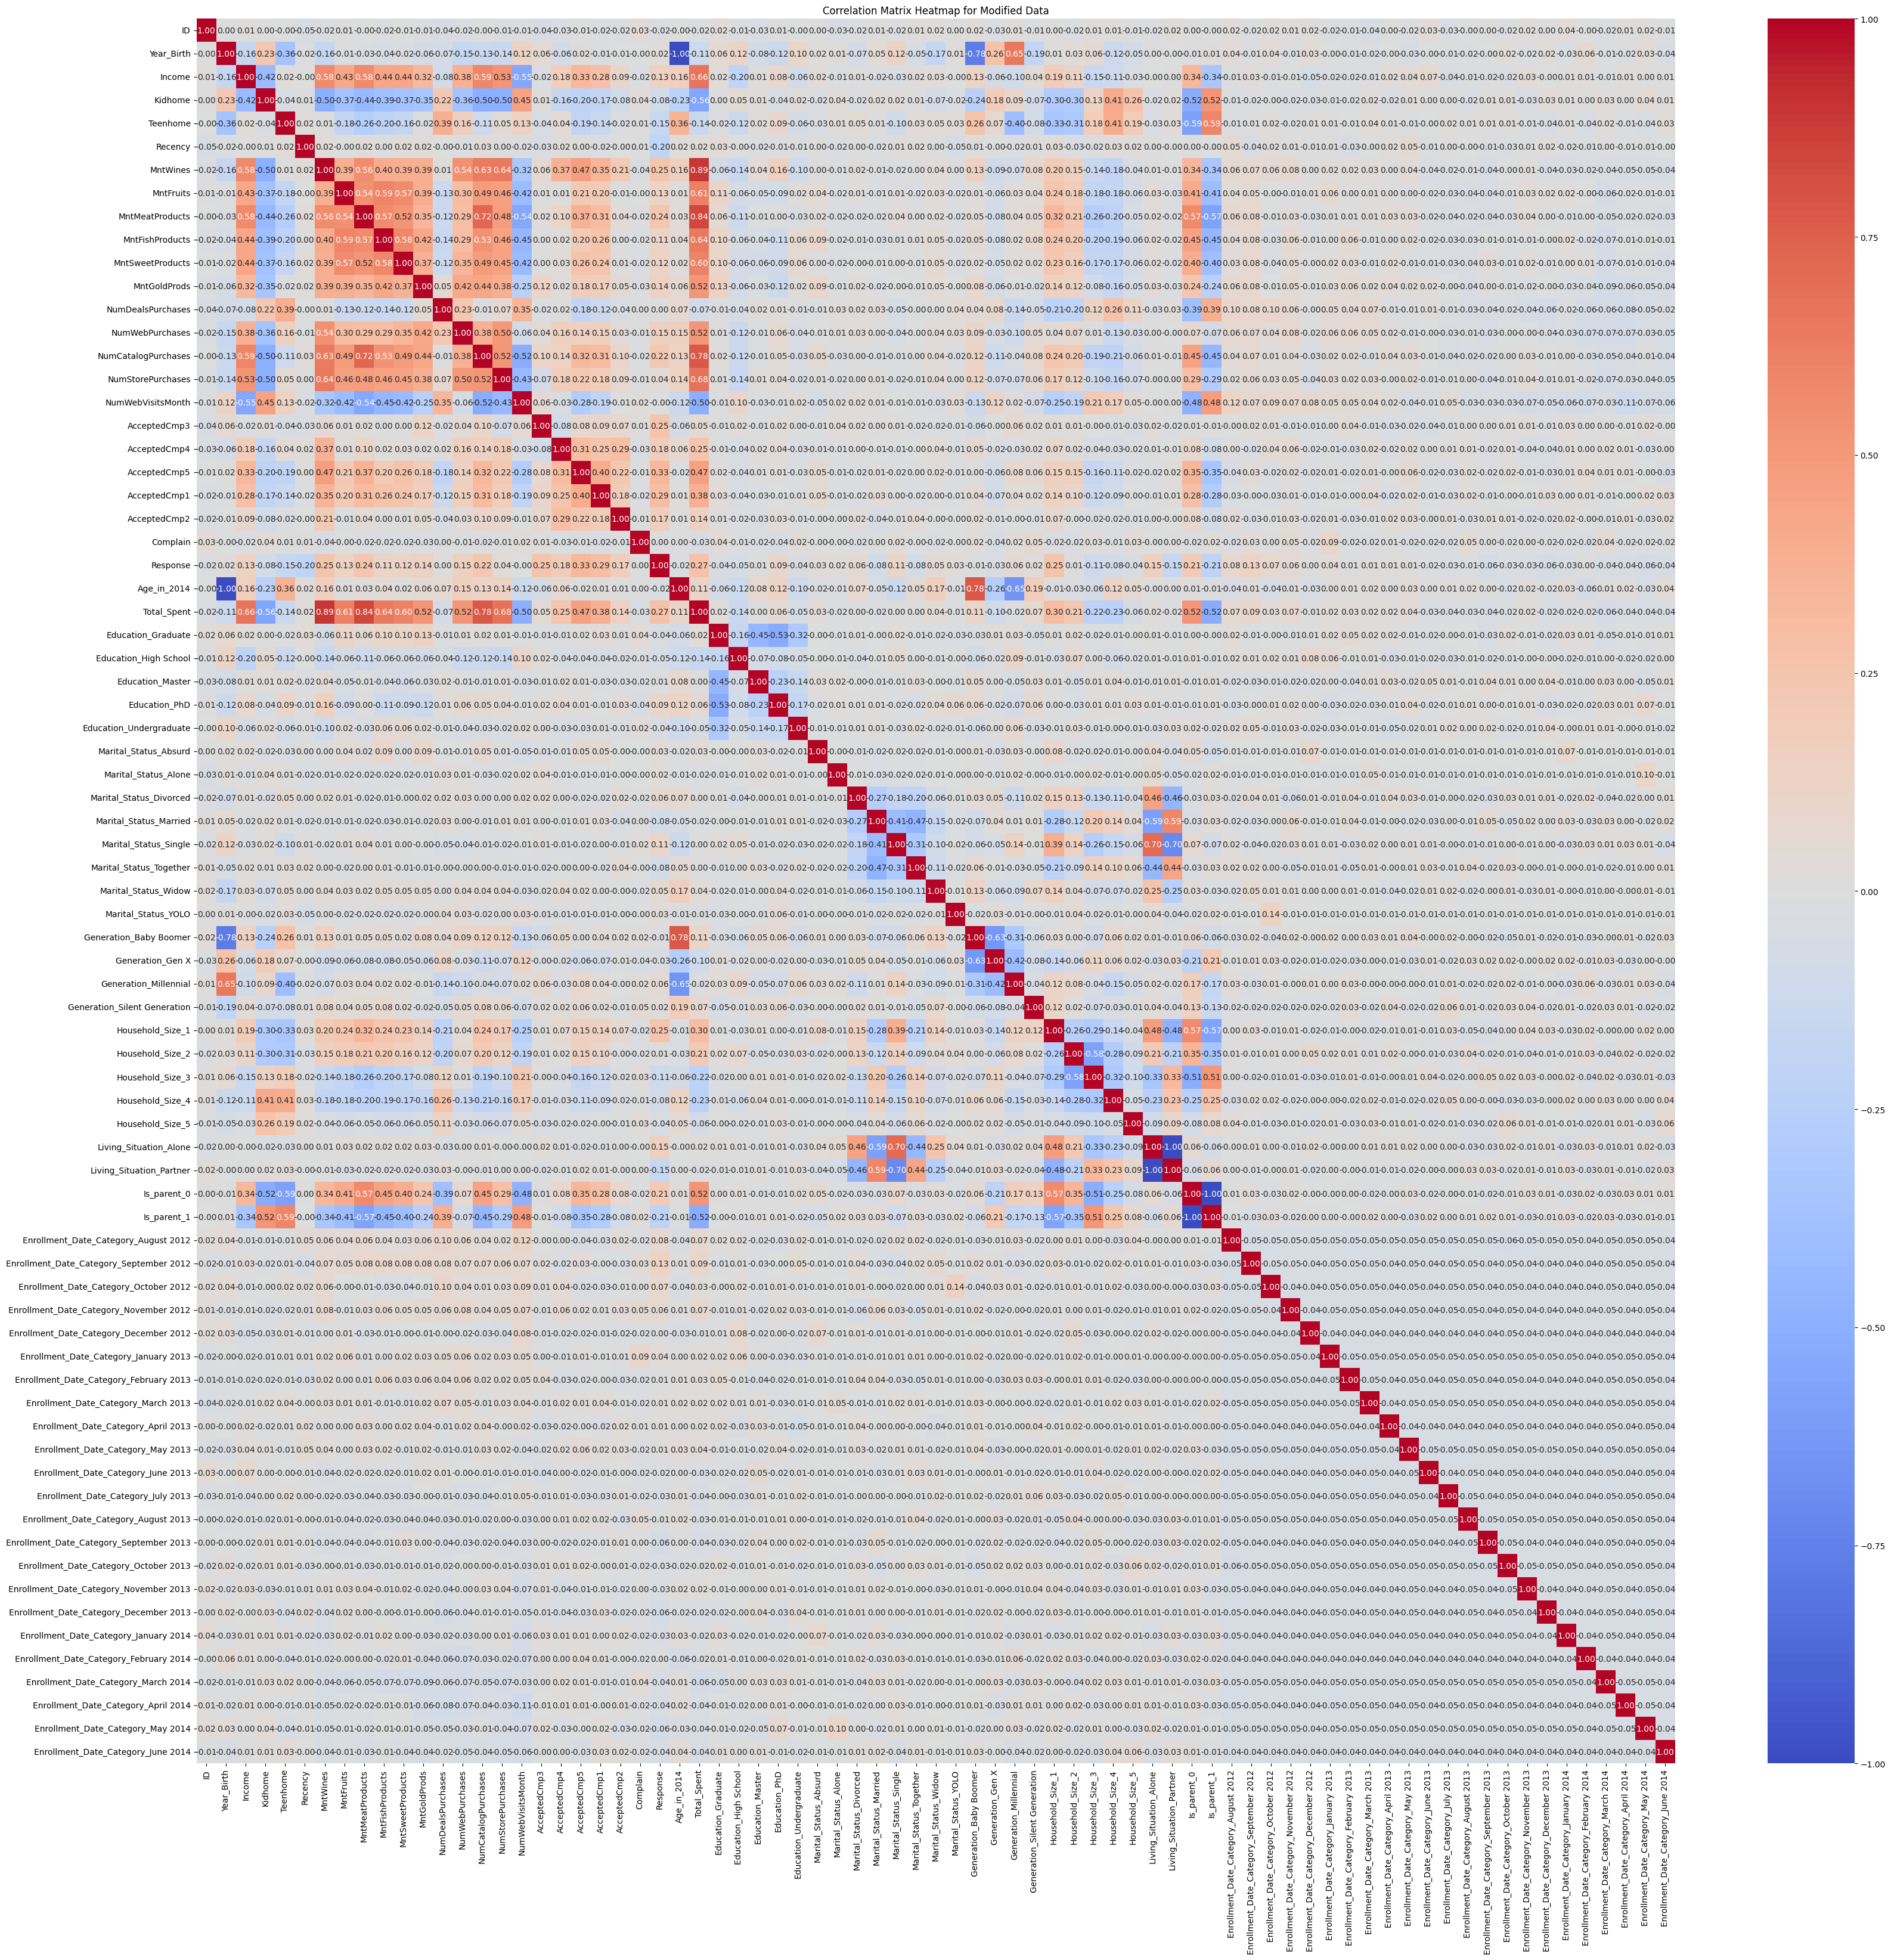

In [ ]:
# Correlation matrix
correlation_matrix_encoded = data_encoded.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(40, 38))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap for Modified Data")
plt.show()

We can see that the enrolment date does not affect much. It is not significantly correlated to anything. Therefore, we can going to drop those columns.

In [ ]:
# Drop the enrollment date categories columns
data_encoded = data_encoded.drop(columns=data_encoded.filter(like='Enrollment_Date_Category').columns)

# Display the modified dataframe
print(data_encoded.head())

        ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0 0.493611    0.303571 0.084832 0.000000  0.000000 0.585859  0.425318   
1 0.194263    0.250000 0.067095 0.500000  0.500000 0.383838  0.007368   
2 0.370029    0.446429 0.105097 0.000000  0.000000 0.262626  0.285332   
3 0.552408    0.785714 0.037471 0.500000  0.000000 0.262626  0.007368   
4 0.475739    0.732143 0.085065 0.500000  0.000000 0.949495  0.115874   

   MntFruits  MntMeatProducts  MntFishProducts  ...  \
0   0.442211         0.316522         0.664093  ...   
1   0.005025         0.003478         0.007722  ...   
2   0.246231         0.073623         0.428571  ...   
3   0.020101         0.011594         0.038610  ...   
4   0.216080         0.068406         0.177606  ...   

   Generation_Silent Generation  Household_Size_1  Household_Size_2  \
0                      0.000000          1.000000          0.000000   
1                      0.000000          0.000000          0.000000   
2                

Now, since we are trying to observe their relationship with 'Response', let's make the necessary changes to be able to include in our heatmap:

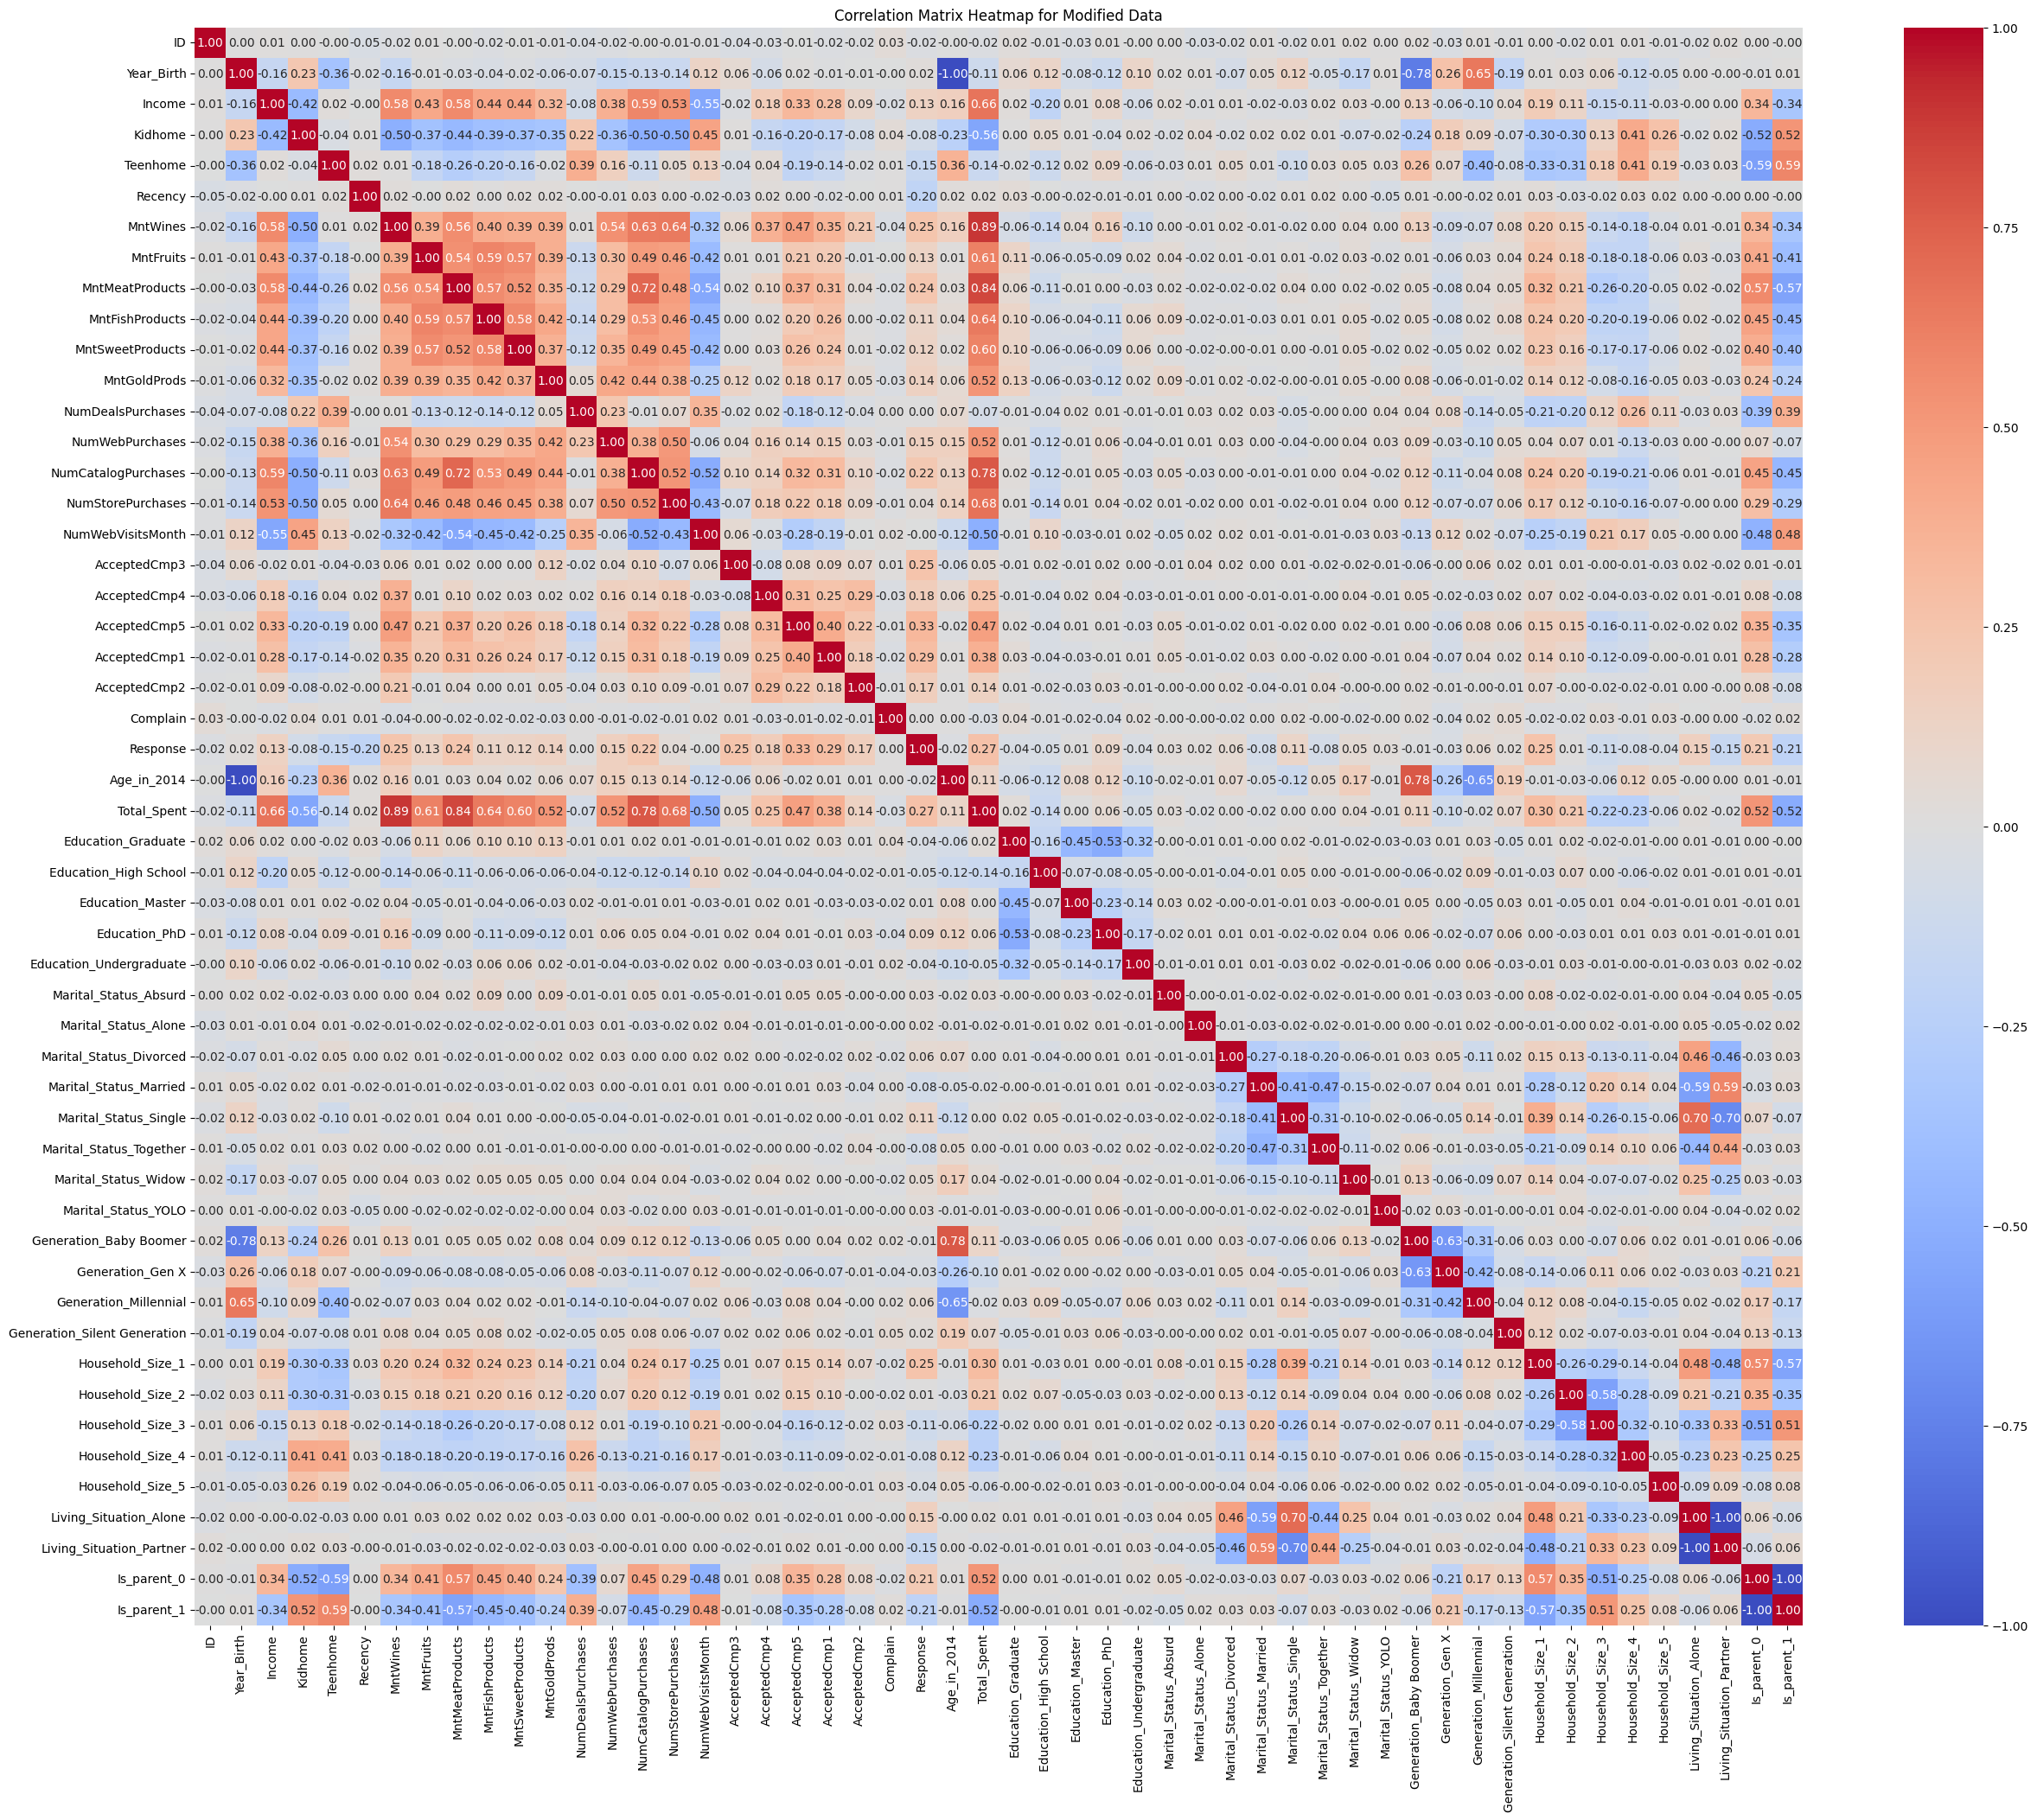

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Response' column
data_encoded['Response'] = label_encoder.fit_transform(data_encoded['Response'])

# Correlation matrix
correlation_matrix_encoded = data_encoded.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap for Modified Data")
plt.show()


Let's extract the highest correlating variables for 'Response' as that is what we are going to predict in the next section.

In [ ]:
# Identify the most correlating variables with 'Response'
top_correlated_variables = correlation_matrix_encoded['Response'].abs().sort_values(ascending=False)[1:]  # Exclude 'Response' itself
top_n_variables = top_correlated_variables.head(10)  # Choose the top N variables (adjust N as needed)
# Chose top 10 for now

# Define the target variable and features
target_variable = 'Response'
features = data_encoded.drop(columns=[target_variable])  # Exclude target variable from features

# Select features using the top N correlated variables

selected_features = features[top_n_variables.index]

selected_features

AcceptedCmp5 AcceptedCmp1  Total_Spent AcceptedCmp3  Household_Size_1  \
0               0            0     0.639683            0          1.000000   
1               0            0     0.008730            0          0.000000   
2               0            0     0.305952            0          0.000000   
3               0            0     0.019048            0          0.000000   
4               0            0     0.165476            0          0.000000   
...           ...          ...          ...          ...               ...   
2235            0            0     0.530159            0          0.000000   
2236            0            1     0.174206            0          0.000000   
2237            0            0     0.490476            0          1.000000   
2238            0            0     0.332540            0          0.000000   
2239            0            0     0.066270            0          0.000000   

      MntWines  MntMeatProducts  NumCatalogPurchases  Is_parent_1  Is_parent_0  
0     0.425318         0.316522             0.357143     0.000000     1.000000  
1     0.007368         0.003478             0.035714     1.000000     0.000000  
2     0.285332         0.073623             0.071429     0.000000     1.000000  
3     0.007368         0.011594             0.000000     1.000000     0.000000  
4     0.115874         0.068406             0.107143     1.000000     0.000000  
...        ...              ...                  ...          ...          ...  
2235  0.474883         0.105507             0.107143     1.000000     0.000000  
2236  0.271936         0.017391             0.071429     1.000000     0.000000  
2237  0.608171         0.125797             0.107143     0.000000     1.000000  
2238  0.286671         0.124058             0.178571     1.000000     0.000000  
2239  0.056263         0.035362             0.035714     1.000000     0.000000  

[2237 rows x 10 columns]

Alright! Looks like we are set for the next section!

# Part B: Classification (Supervised Learning)

## Method 1: Decision Tree

This first version of the model includes all variables:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import time

# Define the target variable and features
target_variable = 'Response'
target = data_encoded[target_variable]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=25) # Since 25 is my favourite number

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=25)

# Measure the time to train the model
start_time = time.time()
classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Time to construct the model:", training_time, "seconds")


Accuracy: 0.8638392857142857
Precision: 0.4918032786885246
Recall: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       388
           1       0.49      0.50      0.50        60

    accuracy                           0.86       448
   macro avg       0.71      0.71      0.71       448
weighted avg       0.86      0.86      0.86       448

Time to construct the model: 0.03536725044250488 seconds


This second version of the model includes the selected features that we identified in the previous section.

In [ ]:
# Split the data into training and testing sets using selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=25)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=25)

# Measure the time to train the model using selected features
start_time = time.time()
classifier.fit(X_train_selected, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
y_pred_selected = classifier.predict(X_test_selected)

# Evaluate the model using selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)
print("Precision with selected features:", precision_selected)
print("Recall with selected features:", recall_selected)
print("Classification Report with selected features:")
print(classification_report(y_test, y_pred_selected))
print("Time to construct the model with selected features:", training_time, "seconds")

Accuracy with selected features: 0.8482142857142857
Precision with selected features: 0.43103448275862066
Recall with selected features: 0.4166666666666667
Classification Report with selected features:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       388
           1       0.43      0.42      0.42        60

    accuracy                           0.85       448
   macro avg       0.67      0.67      0.67       448
weighted avg       0.85      0.85      0.85       448

Time to construct the model with selected features: 0.015270709991455078 seconds


Okay, it's slighly worse, but not by much.

Let's try fine tuning the parameters of the full model.

In [ ]:
# Let's try to fine tune the parameters
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier(random_state=25)

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.8530037713409385


In [ ]:
from sklearn.metrics import f1_score

# Initialize the decision tree classifier with the best hyperparameters
best_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=10, random_state=25)

# Measure the time to train the model
start_time = time.time()
best_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test data
y_pred = best_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Calculate F1 score
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)  # Print F1 score
print("Classification Report:\n", classification_rep)
print("Time to construct the model:", training_time, "seconds")


Accuracy: 0.8816964285714286
Precision: 0.5686274509803921
Recall: 0.48333333333333334
F1 Score: 0.5225225225225224
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       388
           1       0.57      0.48      0.52        60

    accuracy                           0.88       448
   macro avg       0.75      0.71      0.73       448
weighted avg       0.87      0.88      0.88       448

Time to construct the model: 0.03968453407287598 seconds


Wow that looks pretty good!

## Method 2: Gradient Boosting

This first model contains all of the variables

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=25)

#Initializing the model
gb_clf = GradientBoostingClassifier(random_state=25)

#Calculating training time
start = time.time()
gb_clf.fit(X_train, y_train)
training_time_gb = time.time() - start

#Makes the predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Time to construct the model:", training_time_gb, "seconds")

Accuracy: 0.8861607142857143
Precision: 0.6363636363636364
Recall: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       388
           1       0.64      0.35      0.45        60

    accuracy                           0.89       448
   macro avg       0.77      0.66      0.69       448
weighted avg       0.87      0.89      0.87       448

Time to construct the model: 0.8288650512695312 seconds


Now we limit this following model to the features we found were significant

In [ ]:
#Train/Test sets with selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=25)

#Initializing the model
gb_clf = GradientBoostingClassifier(random_state=25)

#Calculating training time
start = time.time()
gb_clf.fit(X_train_selected, y_train)
training_time_gb = time.time() - start

#Makes the predictions
y_pred_gb = gb_clf.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Time to construct the model:", training_time_gb, "seconds")

Accuracy: 0.8683035714285714
Precision: 0.5172413793103449
Recall: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       388
           1       0.52      0.25      0.34        60

    accuracy                           0.87       448
   macro avg       0.70      0.61      0.63       448
weighted avg       0.84      0.87      0.85       448

Time to construct the model: 0.28998613357543945 seconds


Now we fine tune the parameters to find the best model.


In [ ]:
from tqdm import tqdm

params_grid = {
    'loss' : ['log_loss', 'exponential'],
    'n_estimators' : [50, 75, 100, 125, 150],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : [1,2,3,4,5]
}

gb_clf = GradientBoostingClassifier(random_state=25)

grid_search = GridSearchCV(gb_clf, params_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search with progress bar
with tqdm(total=len(params_grid['loss']) * len(params_grid['n_estimators']) * len(params_grid['criterion']) * len(params_grid['max_depth'])) as pbar:
    grid_search.fit(X_train, y_train)
    pbar.update()

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)


  1%|          | 1/100 [04:33<7:30:40, 273.14s/it]

Best Hyperparameters: {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 125}
Best Accuracy: 0.8893260097335023


In [ ]:
best_classifier = GradientBoostingClassifier(random_state=25, criterion = 'friedman_mse', max_depth = 4, loss='exponential', n_estimators=125)

# Measure the time to train the model
start_time = time.time()
best_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test data
y_pred = best_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Calculate F1 score
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)  # Print F1 score
print("Classification Report:\n", classification_rep)
print("Time to construct the model:", training_time, "seconds")

Accuracy: 0.8973214285714286
Precision: 0.6944444444444444
Recall: 0.4166666666666667
F1 Score: 0.5208333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       388
           1       0.69      0.42      0.52        60

    accuracy                           0.90       448
   macro avg       0.80      0.69      0.73       448
weighted avg       0.89      0.90      0.89       448

Time to construct the model: 1.9173784255981445 seconds


## Method 3: Random Forest

Here we run the algorithm on all of the variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=25)

#Initializing the model
gb_rfc = RFC(random_state=25)

#Calculating training time
start = time.time()
gb_rfc.fit(X_train, y_train)
training_time_rfc = time.time() - start

#Makes the predictions
y_pred_rfc = gb_rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print("Time to construct the model:", training_time_rfc, "seconds")

Accuracy: 0.8973214285714286
Precision: 0.75
Recall: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       388
           1       0.75      0.35      0.48        60

    accuracy                           0.90       448
   macro avg       0.83      0.67      0.71       448
weighted avg       0.89      0.90      0.88       448

Time to construct the model: 0.440685510635376 seconds


Here we only use the features we selected

In [ ]:
#Train/Test sets with selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=25)

#Initializing the model
clf_rfc = RFC(random_state=25)

#Calculating training time
start = time.time()
clf_rfc.fit(X_train_selected, y_train)
training_time_rfc = time.time() - start

#Makes the predictions
y_pred_rfc = clf_rfc.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print("Time to construct the model:", training_time_rfc, "seconds")

Accuracy: 0.8883928571428571
Precision: 0.65625
Recall: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       388
           1       0.66      0.35      0.46        60

    accuracy                           0.89       448
   macro avg       0.78      0.66      0.70       448
weighted avg       0.87      0.89      0.87       448

Time to construct the model: 0.34423089027404785 seconds


Here we fine tune the hyper parameters

In [ ]:
params_grid = {
    'criterion' : ['log_loss', 'entropy', 'gini'],
    'n_estimators' : [50, 75, 100, 125, 150],
    'min_samples_split' : [2,4,6,7,10],
    'max_depth' : [2,4,5,8,10],
    'min_samples_leaf' : [1,2,3,4,5]
}

rfc_clf = RFC(random_state=25)

grid_search = GridSearchCV(rfc_clf, params_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

KeyboardInterrupt: 

In [ ]:
best_classifier = RFC(random_state=25, criterion = 'log_loss', n_estimators = 150, min_samples_split = 7, max_depth = 8, min_samples_leaf=1)

# Measure the time to train the model
start_time = time.time()
best_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test data
y_pred = best_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Calculate F1 score
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)  # Print F1 score
print("Classification Report:\n", classification_rep)
print("Time to construct the model:", training_time, "seconds")

Accuracy: 0.890625
Precision: 0.7894736842105263
Recall: 0.25
F1 Score: 0.379746835443038
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       388
           1       0.79      0.25      0.38        60

    accuracy                           0.89       448
   macro avg       0.84      0.62      0.66       448
weighted avg       0.88      0.89      0.86       448

Time to construct the model: 0.9609782695770264 seconds


**CONCLUSION**



Firstly, for all models, the accuracy of the models with all of the features has a higher accuracy that the models with only selected features (Decision Tree:  1) 0.84375 2) 0.83259 3) 0.85714, Gradient Boosting: 1) 0.89286 2) 0.86830 3) 0.89732, Random Forest: 1) 0.88839 2) 0.87723 3) 0.88616). Since the accuracy is calculated from the test set, we can determine that the second model with the selected features is likely underfit. However, it can be seen that when fine tuning the hyper parameters, the accuracy increases for the decision tree and the gradient boosting, however, the accuracy isn’t as high in the full model, than in the model with tuned hyperparameters with the selected features. For the decision tree, the tuned hyperparameters don’t differ much from the standard configuration, and the only difference is that the maximum depth of the model is bounded with a length of 10, unlike the standard configuration which allows for an unbounded length. This most likely means that the model was overfit, in terms of how many nodes were present. For the gradient boosting classifier, the tuned model has less estimators, 50 unlike the standard configuration that has 100, and a maximum length of 4 unlike the standard configuration of the algorithm which is 3. This indicates that the relationship between the predictor variables and the target variable is more complex and defined by fewer relationships. For the Random Forest, the hyperparameters which give us actionable information are max depth as 8, the number of estimators as 150, min samples split as 6 and the minimum number of samples per leaf as 1. Since the number of parameters increased, we can again deduce that the second model (with the selected variables) was underfit.

# Part C: Detecting Outliers

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np

# Instantiate the OneClassSVM model
svm_model = OneClassSVM(kernel='rbf', nu=0.025)  # adjust nu as needed

# Fit the model to your data
svm_model.fit(data_encoded)

# Predict outliers
outliers = svm_model.predict(data_encoded)

# Get the indices of outliers
outlier_indices = np.where(outliers == -1)[0]

# Print the indices of outliers
print("Indices of outliers:", outlier_indices)


Indices of outliers: [   9   21   27   67  138  160  178  204  215  230  250  341  401  427
  556  583  587  684  731  823  891  921  997  999 1039 1176 1196 1262
 1278 1285 1305 1320 1331 1339 1369 1441 1470 1573 1589 1638 1650 1696
 1707 1746 1785 1847 1866 1888 1895 1920 1958 1972 2015 2081 2090 2095
 2164 2168 2225]


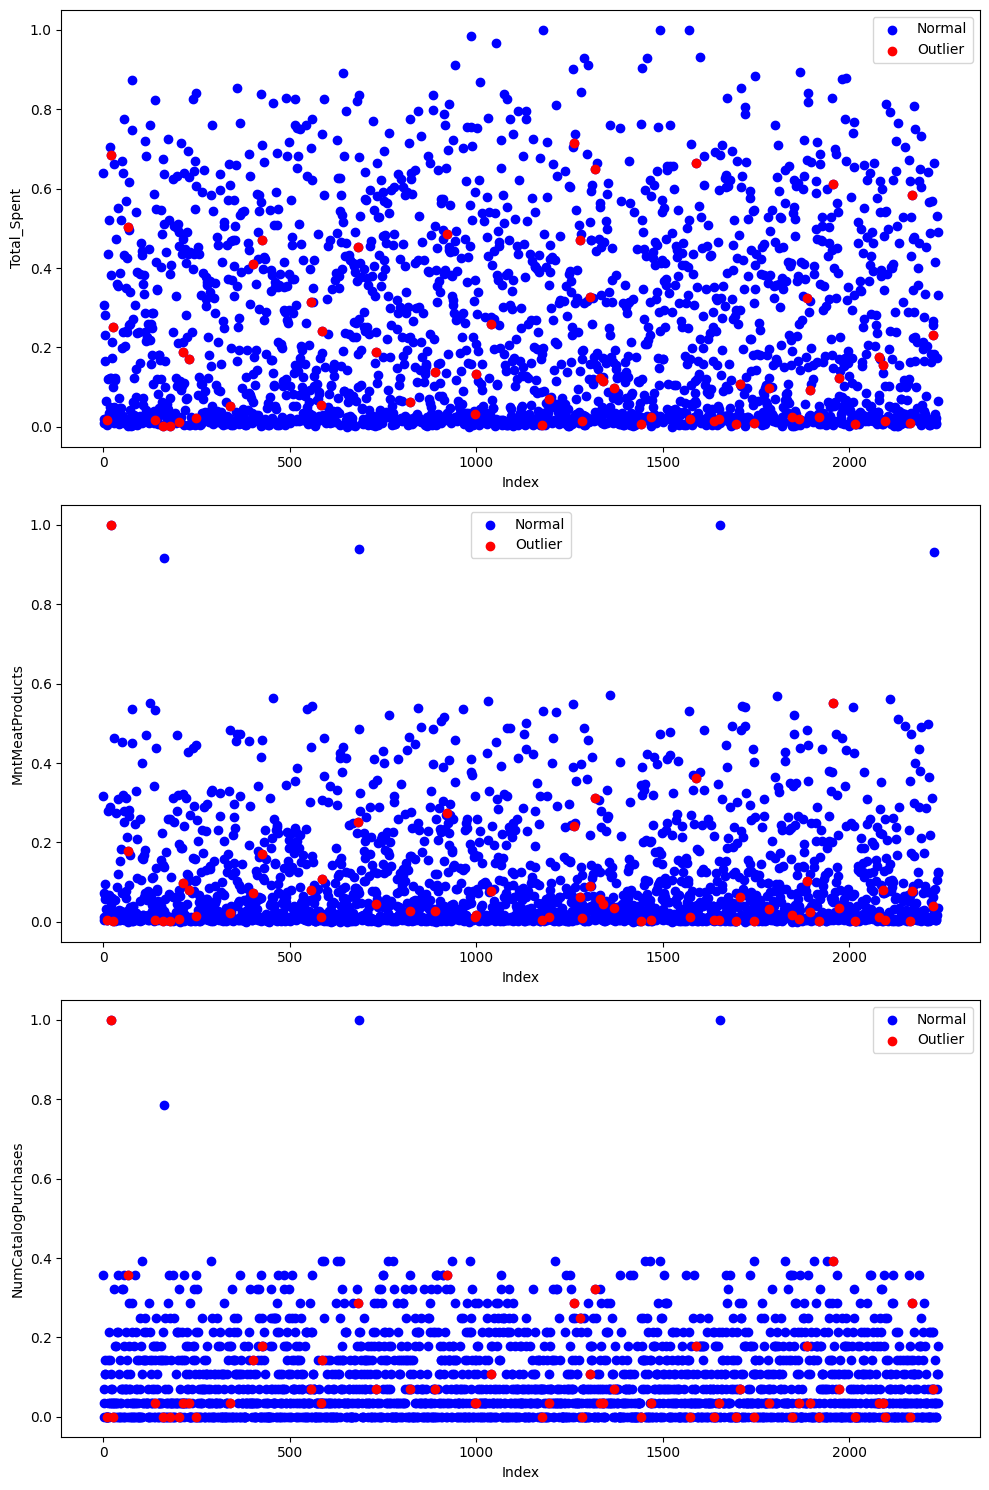

In [ ]:
import matplotlib.pyplot as plt

# Reminder of most important features found above with our correlation matrix
# AcceptedCmp5	AcceptedCmp1	Total_Spent	AcceptedCmp3	Household_Size_1	MntWines	MntMeatProducts	NumCatalogPurchases	Is_parent_1	Is_parent_0

# Select a few features to plot
features_to_plot = ['Total_Spent', 'MntMeatProducts', 'NumCatalogPurchases']  # Replace with actual feature names

# Create subplots for each feature
fig, axs = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, len(features_to_plot) * 5))

# Plot each feature with outliers highlighted
for i, feature in enumerate(features_to_plot):
    ax = axs[i]
    ax.scatter(data_encoded.index, data_encoded[feature], label='Normal', color='blue')  # Plot normal data
    ax.scatter(outlier_indices, data_encoded.loc[outlier_indices, feature], label='Outlier', color='red')  # Plot outliers
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import OneClassSVM

# Select the subset of data with the specified features
subset_data = data_encoded[['Total_Spent', 'MntMeatProducts', 'NumCatalogPurchases', 'Income']]

# Initialize the One-Class SVM model
svm_model = OneClassSVM(nu=0.025)

# Fit the model to the subset data
svm_model.fit(subset_data)

# Predict outliers
outlier_predictions = svm_model.predict(subset_data)

# Get the indices of outliers
outlier_indices = [index for index, prediction in enumerate(outlier_predictions) if prediction == -1]

# Print the indices of outliers
print("Indices of outliers:")
print(outlier_indices)



Indices of outliers:
[21, 27, 104, 164, 339, 363, 556, 588, 614, 633, 641, 652, 684, 821, 859, 892, 939, 978, 981, 984, 1007, 1049, 1084, 1126, 1149, 1176, 1242, 1256, 1297, 1355, 1462, 1485, 1489, 1521, 1569, 1579, 1638, 1650, 1746, 1785, 1805, 1842, 1843, 1873, 1923, 1924, 1955, 1958, 2056, 2095, 2106, 2129, 2164, 2208, 2225, 2230]


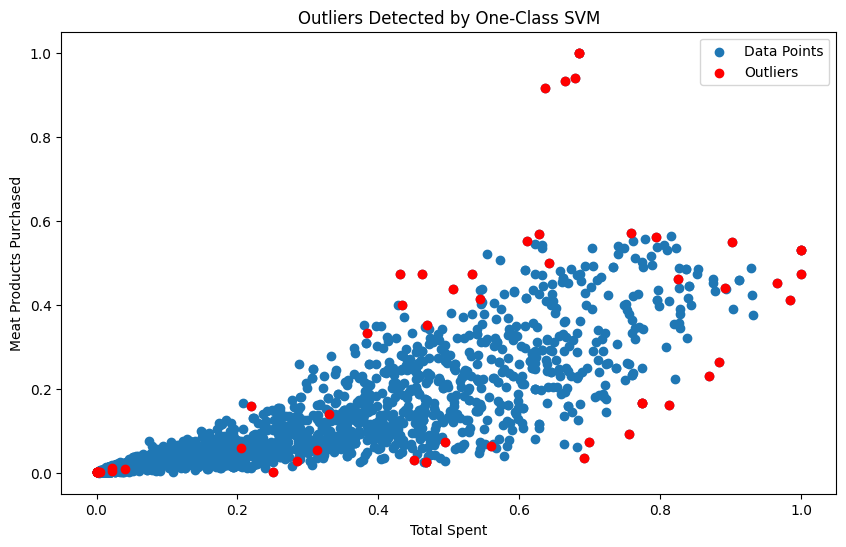

In [ ]:
import matplotlib.pyplot as plt

# Plot the subset of data
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['Total_Spent'], subset_data['MntMeatProducts'], label='Data Points')

# Highlight the outliers
outlier_points = subset_data.iloc[outlier_indices]
plt.scatter(outlier_points['Total_Spent'], outlier_points['MntMeatProducts'], color='red', label='Outliers')

# Set labels and title
plt.xlabel('Total Spent')
plt.ylabel('Meat Products Purchased')
plt.title('Outliers Detected by One-Class SVM')
plt.legend()

# Show plot
plt.show()
